# Regression Project 1 and 2

### Source of the dataset

https://www.kaggle.com/shivachandel/kc-house-data

## About the dataset

Online property companies offer valuations of houses using machine learning techniques. The aim of this project is to predict the house sales in King County, Washington State, USA using different machine learning models. The dataset consists of historic data of houses sold between May 2014 to May 2015.
We will predict the sales of houses in King County and analyse different variables.

The dataset consists of house prices from King County an area in the US State of Washington, this data also covers Seattle.  This data was published/released under CC0: Public Domain.
The dataset consisted of 21 variables and 21613 observations.

##### id - Unique ID for each home sold
##### date - Date of the home sale
##### price - Price of each home sold
##### bedrooms - Number of bedrooms
##### bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
##### sqft_living - Square footage of the apartments interior living space
##### sqft_lot - Square footage of the land space
##### floors - Number of floors
##### waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not (Yes, No)
##### view - An index from 0 to 4 of how good the view of the property was
##### condition - Values like Excellent, Very Good, Good, Bad, Poor on the condition of the apartment,
##### grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
##### sqft_above - The square footage of the interior housing space that is above ground level
##### sqft_basement - The square footage of the interior housing space that is below ground level
##### yr_built - The year the house was initially built
##### yr_renovated - The year of the house’s last renovation
##### zipcode - What zipcode area the house is in
##### lat - Lattitude
##### long - Longitude
##### sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
##### sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

# Regression Project Part 1

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# ML Libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from  sklearn.linear_model import Ridge
from  sklearn.linear_model import Lasso
from  sklearn.preprocessing  import PolynomialFeatures
from  sklearn.svm import LinearSVR
from  sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from  sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor

In [104]:
# number of jobs for parallel processing
jobs = 10

In [105]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [106]:
house_price_df=pd.read_csv("kc_house_data_Final.csv")
house_price_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,No,0,Good,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,No,0,Good,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,No,0,Good,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,No,0,Poor,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,No,0,Good,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [107]:
# checking the shape of the dataset
house_price_df.shape

(21613, 21)

In [108]:
house_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  object 
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  object 
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [109]:
house_price_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.234303,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.766318,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [110]:
# checking the null values
house_price_df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

we can see that we do not have any null values in the dataset. Though we can induce some missing values in the dataset.

### Checking the unique values in the variables

#### 1. Variable 'id'

In [111]:
len(house_price_df['id'].unique())

21436

#### 2. Variable 'date'

In [112]:
house_price_df['date'].unique()

array(['20141013T000000', '20141209T000000', '20150225T000000',
       '20150218T000000', '20140512T000000', '20140627T000000',
       '20150115T000000', '20150415T000000', '20150312T000000',
       '20150403T000000', '20140527T000000', '20140528T000000',
       '20141007T000000', '20150124T000000', '20140731T000000',
       '20140529T000000', '20141205T000000', '20150424T000000',
       '20140514T000000', '20140826T000000', '20140703T000000',
       '20140516T000000', '20141120T000000', '20141103T000000',
       '20140626T000000', '20141201T000000', '20140624T000000',
       '20150302T000000', '20141110T000000', '20141203T000000',
       '20140613T000000', '20141230T000000', '20150213T000000',
       '20140620T000000', '20140715T000000', '20140811T000000',
       '20140707T000000', '20141028T000000', '20140729T000000',
       '20140718T000000', '20150325T000000', '20140716T000000',
       '20150428T000000', '20150311T000000', '20140916T000000',
       '20150217T000000', '20141231T0000

In [113]:
len(house_price_df['date'].unique())

372

#### 3. Variable 'bedrooms'

In [114]:
house_price_df['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33])

#### 4. Variable 'bathrooms'

In [115]:
house_price_df['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 0.  , 1.25, 5.25, 6.  , 0.5 ,
       5.5 , 6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

#### 5. Variable 'floors'

In [116]:
house_price_df['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

#### 6. Variable 'waterfront'

In [117]:
house_price_df['waterfront'].unique()

array(['No', 'Yes'], dtype=object)

#### 7. Variable 'view'

In [118]:
house_price_df['view'].unique()

array([0, 3, 4, 2, 1])

#### 8. Variable 'grade' 

In [119]:
house_price_df['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1])

#### 9. Variable 'zipcode'

In [120]:
house_price_df['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

## Encoding categorical variables

#### 1. Variable 'waterfront'

In [121]:
house_price_df['waterfront'].value_counts()

No     21450
Yes      163
Name: waterfront, dtype: int64

In [122]:
house_price_df['waterfront'] = house_price_df['waterfront'].map({'No': 1, 'Yes': 0}).astype(int)

In [123]:
house_price_df['waterfront'].value_counts()

1    21450
0      163
Name: waterfront, dtype: int64

#### 2. Variable 'condition'

In [124]:
house_price_df['condition'].unique()

array(['Good', 'Poor', 'Bad', 'Excellent', 'Very Good'], dtype=object)

In [125]:
house_price_df['condition'].value_counts()

Good         14031
Bad           5679
Poor          1701
Very Good      172
Excellent       30
Name: condition, dtype: int64

In [126]:
house_price_df['condition'] = house_price_df['condition'].map({'Excellent' : 5, 'Very Good' : 4, 'Good' : 3, 'Bad' : 2, 'Poor' : 1}).astype(int)

In [127]:
house_price_df['condition'].value_counts()

3    14031
2     5679
1     1701
4      172
5       30
Name: condition, dtype: int64

In [128]:
#printing the dataframe
house_price_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,1,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,1,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,1,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,1,0,1,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,1,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Inducing Missing Values

In [129]:
np.random.seed(0)
masking_array = np.random.randint(100,size=house_price_df.shape) < 90
house_price_df = house_price_df.where(masking_array,np.nan)


In [130]:
# checking for missing values
house_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19461 non-null  float64
 1   date           19551 non-null  object 
 2   price          19441 non-null  float64
 3   bedrooms       19385 non-null  float64
 4   bathrooms      19550 non-null  float64
 5   sqft_living    19479 non-null  float64
 6   sqft_lot       19481 non-null  float64
 7   floors         19513 non-null  float64
 8   waterfront     19414 non-null  float64
 9   view           19383 non-null  float64
 10  condition      19453 non-null  float64
 11  grade          19476 non-null  float64
 12  sqft_above     19384 non-null  float64
 13  sqft_basement  19453 non-null  float64
 14  yr_built       19450 non-null  float64
 15  yr_renovated   19387 non-null  float64
 16  zipcode        19521 non-null  float64
 17  lat            19382 non-null  float64
 18  long  

### Checking percentage of missing values present in the dataset

In [131]:
total = house_price_df.isnull().sum().sort_values(ascending=False)
percent = (house_price_df.isnull().sum()/house_price_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
lat,2231,0.103225
view,2230,0.103179
sqft_above,2229,0.103132
bedrooms,2228,0.103086
yr_renovated,2226,0.102994
waterfront,2199,0.101744
price,2172,0.100495
yr_built,2163,0.100079
condition,2160,0.099940
sqft_basement,2160,0.099940


In [132]:
total1 = house_price_df.isnull().sum().sum()
percentage1 = round((house_price_df.isnull().sum().sum())/(house_price_df.shape[0] * house_price_df.shape[1])*100,2)
print('Total Number Of missing values present in the dataset is: ', total1)
print('Percentage of missing values in the dataset is: ', percentage1)

Total Number Of missing values present in the dataset is:  45222
Percentage of missing values in the dataset is:  9.96


From above we can see that 5%-10% missing values have been indused in the dataset.

## Checking for missing value in the target column 'price'

In [133]:
# removing the missing values in the target column to analyze properly
house_price_df = house_price_df.dropna(how='all', subset=['price'])
house_price_df.isnull().sum()

id               1944
date             1887
price               0
bedrooms         2016
bathrooms        1845
sqft_living      1919
sqft_lot         1902
floors           1881
waterfront       1965
view             2018
condition        1935
grade            1930
sqft_above       2032
sqft_basement    1915
yr_built         1942
yr_renovated     1994
zipcode          1872
lat              1998
long             1914
sqft_living15    1953
sqft_lot15       1889
dtype: int64

## Exploratory Data Analysis

### 1. Analysing the target variable 'price'

Skewness: 4.103287


/home/jack/PycharmProjects/DataScience_Project_Aditi/venv/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


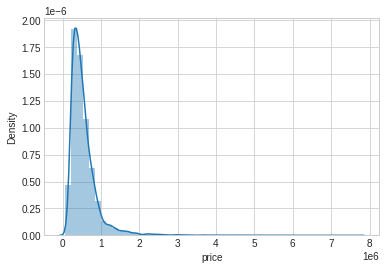

In [134]:
sns.distplot(house_price_df['price']);
#skewness
print("Skewness: %f" % house_price_df['price'].skew())

From the above plot of variable 'price' we see that the distribution of the target variable is skewed. 

### 4. Analysing variable 'bedrooms'

/home/jack/PycharmProjects/DataScience_Project_Aditi/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

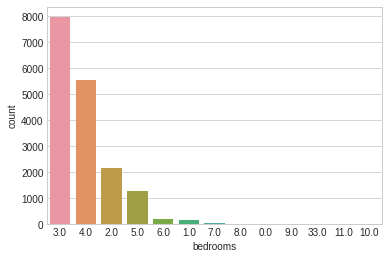

In [135]:
sns.countplot(house_price_df['bedrooms'],order=house_price_df['bedrooms'].value_counts().index)

### 5. Analysing variable 'floors'

Text(0.5, 0, 'Floors')

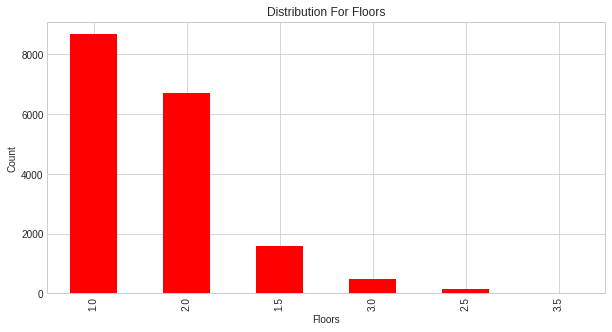

In [136]:
fig=plt.figure(figsize=(10,5))
house_price_df['floors'].value_counts().plot.bar(color='red')
plt.title('Distribution For Floors')
plt.ylabel('Count')
plt.xlabel('Floors')

### 6. Analysing variable 'sqft_above' and 'price'

<AxesSubplot:title={'center':'house prices by sqft_above'}, xlabel='sqft_above', ylabel='price'>

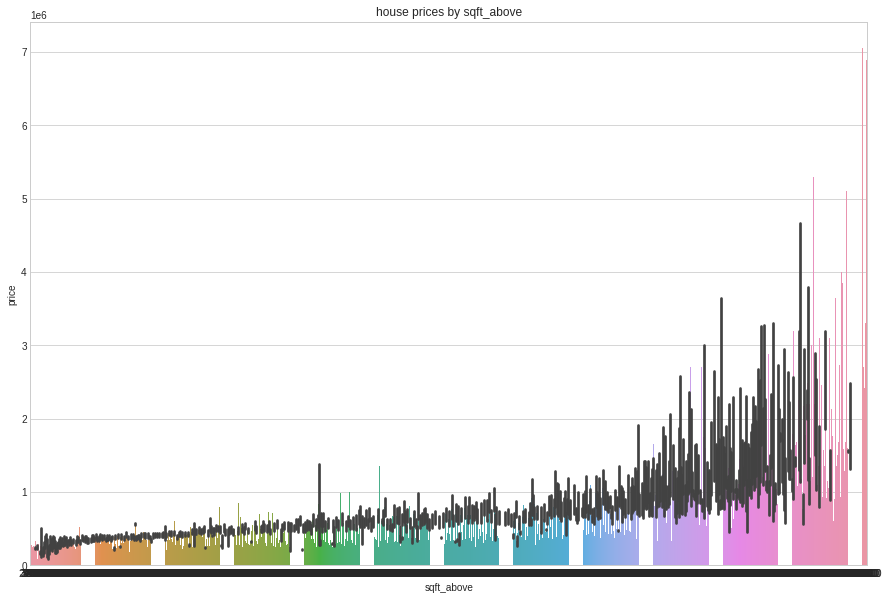

In [137]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
plt.title("house prices by sqft_above")
plt.xlabel('sqft_above')
plt.ylabel('house prices')
sns.barplot(x='sqft_above',y='price',data=house_price_df)

### 7. Correlation Matrix

<AxesSubplot:>

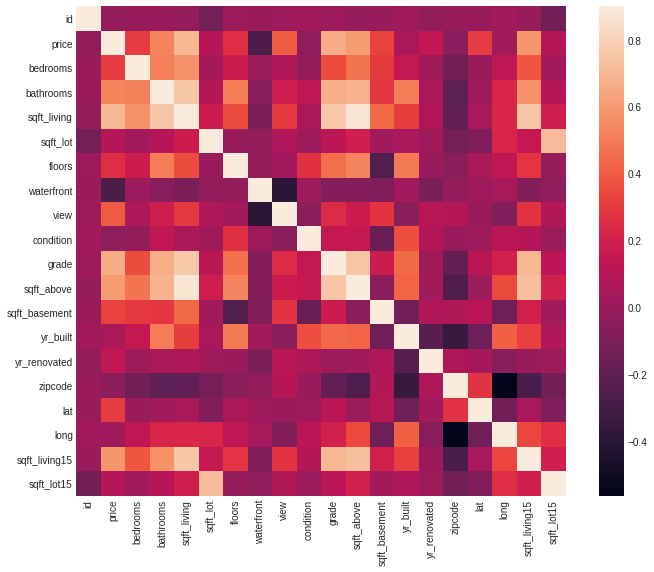

In [138]:
corr_matrix = house_price_df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr_matrix, vmax=0.9, square=True)

### 8. Correlation Heatmap

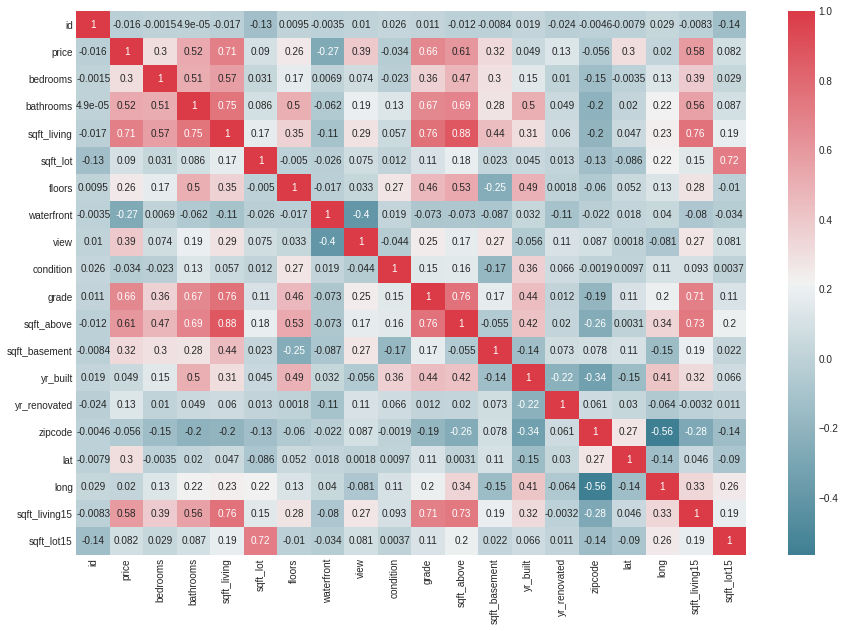

In [139]:
def correlation_heatmap(h):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(house_price_df.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(house_price_df)

### 9. Data Distribution of different variables

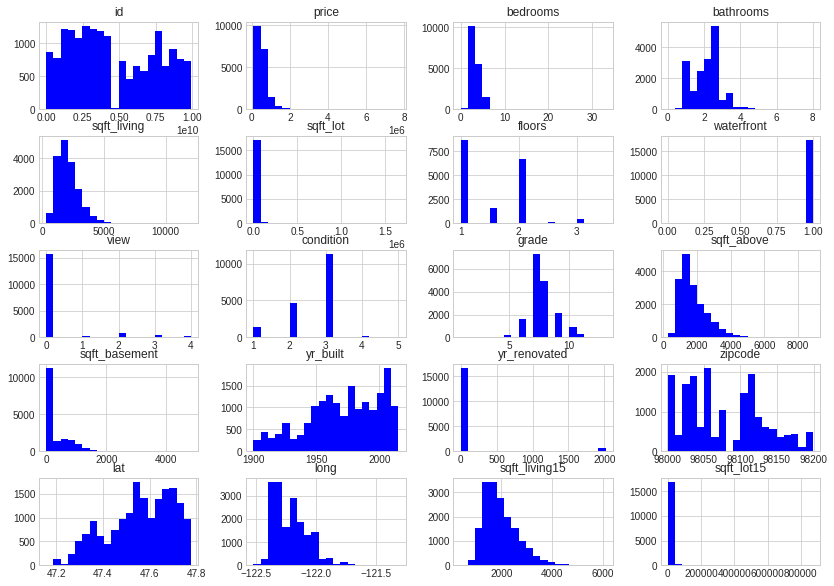

In [140]:
import matplotlib.pyplot as plt # plotting

plt.style.use('seaborn-whitegrid')


house_price_df.hist(bins=20, figsize=(14,10), color='blue')
plt.show()


From the above data distribution, we see that it is skewed.

### Dropping the variables

In [141]:
# dropping columns id, date and zipcode
house_price_df.drop(columns=['id', 'date', 'zipcode', 'yr_built', 'yr_renovated'], inplace = True)

# printing the dataframe again
house_price_df.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,1.0,0.0,3.0,7.0,1180.0,0.0,47.5112,-122.257,1340.0,5650.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,1.0,0.0,3.0,7.0,NaN,400.0,47.7210,-122.319,1690.0,7639.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,1.0,0.0,3.0,6.0,770.0,0.0,47.7379,-122.233,2720.0,8062.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,1.0,0.0,1.0,NaN,1050.0,910.0,47.5208,-122.393,1360.0,5000.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,1.0,NaN,3.0,8.0,1680.0,0.0,47.6168,-122.045,1800.0,7503.0


### 10. Checking correlations of target value 'price' with scatter plot of each feature

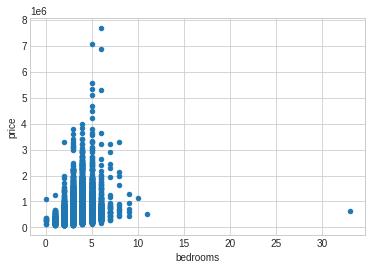

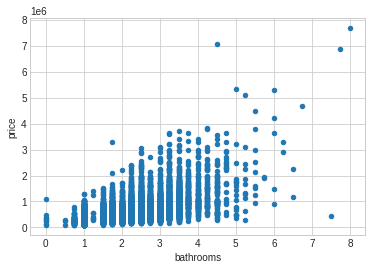

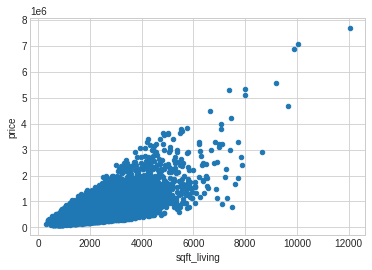

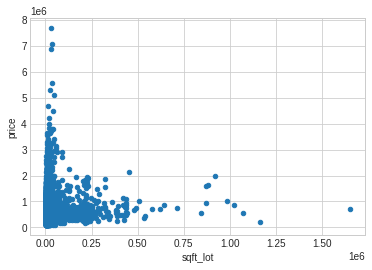

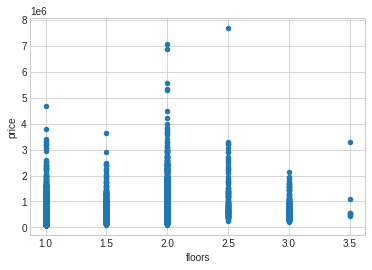

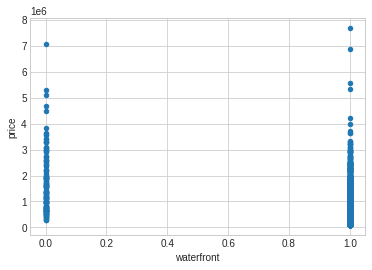

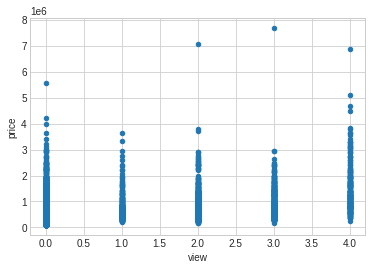

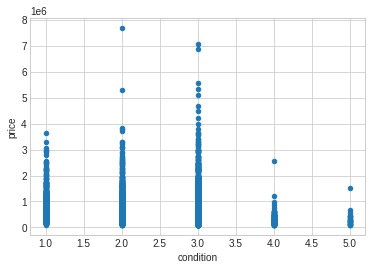

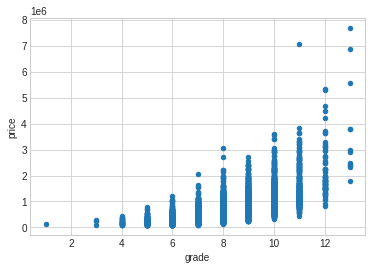

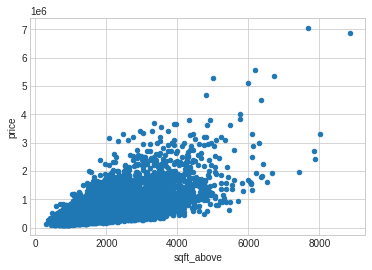

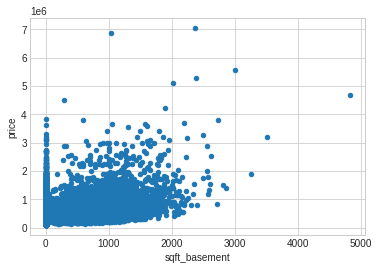

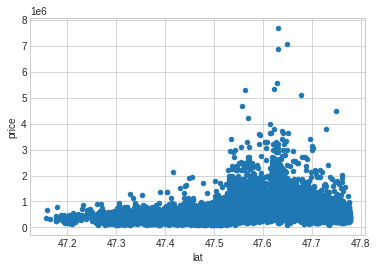

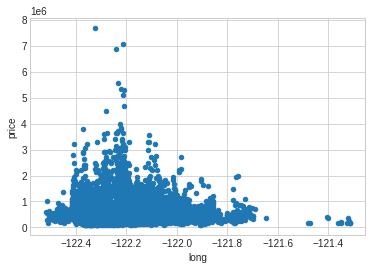

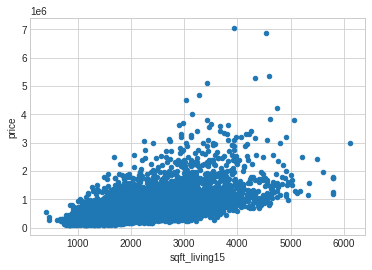

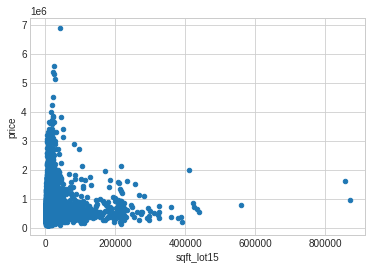

In [142]:
for c in house_price_df.columns:
    if (c != 'price') & (c != 'date'):
        house_price_df[[c,'price']].plot(kind='scatter',x=c,y='price')

## Cleaning the data (encoding variables)

### 1. Printing the missing values in the dataset

In [143]:
# printing the missing values
house_price_df.isnull().sum()

price               0
bedrooms         2016
bathrooms        1845
sqft_living      1919
sqft_lot         1902
floors           1881
waterfront       1965
view             2018
condition        1935
grade            1930
sqft_above       2032
sqft_basement    1915
lat              1998
long             1914
sqft_living15    1953
sqft_lot15       1889
dtype: int64

### 2. Variable 'bedrooms'

In [144]:
house_price_df['bedrooms'].unique()

array([ 3.,  2.,  4., nan,  5.,  1.,  6.,  7.,  0.,  8.,  9., 11., 10.,
       33.])

In [145]:
house_price_df['bedrooms'].value_counts()

3.0     7962
4.0     5567
2.0     2175
5.0     1290
6.0      219
1.0      152
7.0       31
8.0       11
0.0       10
9.0        5
33.0       1
11.0       1
10.0       1
Name: bedrooms, dtype: int64

#### replacing the np.nan values in the variable 'bedrooms' with the mode

In [146]:
house_price_df['bedrooms'] = house_price_df['bedrooms'].fillna(house_price_df['bedrooms'].mode()[0]).astype(int)

In [147]:
# checking again the value count of variable bedrooms
house_price_df['bedrooms'].value_counts()

3     9978
4     5567
2     2175
5     1290
6      219
1      152
7       31
8       11
0       10
9        5
33       1
10       1
11       1
Name: bedrooms, dtype: int64

### 3. Variable 'bathrooms'

In [148]:
house_price_df['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  ,  nan, 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.25, 3.75, 5.  , 0.  , 1.25, 4.5 , 5.25, 6.  , 4.75,
       0.5 , 5.5 , 5.75, 8.  , 6.75, 7.5 , 7.75, 6.25, 6.5 ])

In [149]:
house_price_df['bathrooms'].value_counts()

2.50    4418
1.00    3106
1.75    2480
2.25    1678
2.00    1551
1.50    1194
2.75     961
3.00     614
3.50     594
3.25     479
3.75     122
4.00      99
4.50      77
4.25      65
0.75      64
4.75      22
5.00      18
5.25      11
5.50       9
0.00       8
1.25       8
6.00       5
0.50       3
5.75       2
6.25       2
6.50       2
7.75       1
7.50       1
8.00       1
6.75       1
Name: bathrooms, dtype: int64

#### replacing the np.nan values in the variable 'bathrooms' with the median

In [150]:
house_price_df['bathrooms'].fillna(house_price_df['bathrooms'].median(), inplace=True)

In [151]:
# checking again the value count of variable bathrooms
house_price_df['bathrooms'].value_counts()

2.50    4418
2.25    3523
1.00    3106
1.75    2480
2.00    1551
1.50    1194
2.75     961
3.00     614
3.50     594
3.25     479
3.75     122
4.00      99
4.50      77
4.25      65
0.75      64
4.75      22
5.00      18
5.25      11
5.50       9
0.00       8
1.25       8
6.00       5
0.50       3
5.75       2
6.25       2
6.50       2
7.75       1
7.50       1
8.00       1
6.75       1
Name: bathrooms, dtype: int64

### 4. Variable 'sqft_living'

#### replacing the np.nan values in the variable 'sqft_living' with the median

In [152]:
house_price_df['sqft_living'].fillna(house_price_df['sqft_living'].median(), inplace=True)

### 5. Variable 'sqft_lot'

#### replacing the np.nan values in the variable 'sqft_lot' with the median

In [153]:
house_price_df['sqft_lot'].fillna(house_price_df['sqft_lot'].median(), inplace=True)

### 6. Variable 'floors'

In [154]:
house_price_df['floors'].unique()

array([1. , 2. , 1.5, nan, 3. , 2.5, 3.5])

In [155]:
house_price_df['floors'].value_counts()

1.0    8669
2.0    6693
1.5    1568
3.0     492
2.5     130
3.5       8
Name: floors, dtype: int64

#### replacing the np.nan values in the variable 'floors' with the mode

In [156]:
house_price_df['floors'] = house_price_df['floors'].fillna(house_price_df['floors'].mode()[0])

In [157]:
# checking again the value count of variable floors
house_price_df['floors'].value_counts()

1.0    10550
2.0     6693
1.5     1568
3.0      492
2.5      130
3.5        8
Name: floors, dtype: int64

### 7. Variable 'waterfront'

In [158]:
house_price_df['waterfront'].unique()

array([ 1., nan,  0.])

In [159]:
house_price_df['waterfront'].value_counts()

1.0    17342
0.0      134
Name: waterfront, dtype: int64

#### replacing the np.nan values in the variable 'waterfront' with the mode

In [160]:
house_price_df['waterfront'] = house_price_df['waterfront'].fillna(house_price_df['waterfront'].mode()[0]).astype(int)

In [161]:
# checking again the value count of variable waterfront
house_price_df['waterfront'].value_counts()

1    19307
0      134
Name: waterfront, dtype: int64

### 8. Variable 'view'

In [162]:
house_price_df['view'].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [163]:
house_price_df['view'].value_counts()

0.0    15732
2.0      772
3.0      415
1.0      257
4.0      247
Name: view, dtype: int64

#### replacing the np.nan values in the variable 'view' with the mode

In [164]:
house_price_df['view'] = house_price_df['view'].fillna(house_price_df['view'].mode()[0]).astype(int)

In [165]:
# checking again the value count of variable view
house_price_df['view'].value_counts()

0    17750
2      772
3      415
1      257
4      247
Name: view, dtype: int64

### 8. Variable 'condition'

In [166]:
house_price_df['condition'].unique()

array([ 3.,  1.,  2., nan,  5.,  4.])

In [167]:
house_price_df['condition'].value_counts()

3.0    11313
2.0     4653
1.0     1379
4.0      135
5.0       26
Name: condition, dtype: int64

#### replacing the np.nan values in the variable 'condition' with the mode

In [168]:
house_price_df['condition'] = house_price_df['condition'].fillna(house_price_df['condition'].mode()[0]).astype(int)

In [169]:
# checking again the value count of variable condition
house_price_df['condition'].value_counts()

3    13248
2     4653
1     1379
4      135
5       26
Name: condition, dtype: int64

### 9. Variable 'grade'

In [170]:
house_price_df['grade'].unique()

array([ 7.,  6., nan,  8.,  9.,  5., 10., 11., 12.,  4.,  3., 13.,  1.])

In [171]:
house_price_df['grade'].value_counts()

7.0     7327
8.0     4904
9.0     2117
6.0     1637
10.0     921
11.0     306
5.0      184
12.0      73
4.0       26
13.0      12
3.0        3
1.0        1
Name: grade, dtype: int64

#### replacing the np.nan values in the variable 'grade' with the mode

In [172]:
house_price_df['grade'] = house_price_df['grade'].fillna(house_price_df['grade'].mode()[0]).astype(int)

In [173]:
# checking again the value count of variable condition
house_price_df['grade'].value_counts()

7     9257
8     4904
9     2117
6     1637
10     921
11     306
5      184
12      73
4       26
13      12
3        3
1        1
Name: grade, dtype: int64

### 10. Variable 'sqft_above'

#### replacing the np.nan values in the variable 'sqft_above' with the median

In [174]:
house_price_df['sqft_above'].fillna(house_price_df['sqft_above'].median(), inplace=True)

### 11. Variable 'sqft_basement'

#### replacing the np.nan values in the variable 'sqft_basement' with the median

In [175]:
house_price_df['sqft_basement'].fillna(house_price_df['sqft_basement'].median(), inplace=True)

### 12. Variable 'lat'

In [176]:
len(house_price_df['lat'].unique())

4852

#### replacing the np.nan values in the variable 'lat' with the median

In [177]:
house_price_df['lat'].fillna(house_price_df['lat'].median(), inplace=True)

### 13. Variable 'long'

In [178]:
len(house_price_df['long'].unique())

729

#### replacing the np.nan values in the variable 'long' with the median

In [179]:
house_price_df['long'].fillna(house_price_df['long'].median(), inplace=True)

### 14. Variable 'sqft_living15'

In [180]:
len(house_price_df['sqft_living15'].unique())

709

#### replacing the np.nan values in the variable 'sqft_living15' with the median

In [181]:
house_price_df['sqft_living15'].fillna(house_price_df['sqft_living15'].median(), inplace=True)

### 15. Variable 'sqft_lot15'

In [182]:
len(house_price_df['sqft_lot15'].unique())

7665

#### replacing the np.nan values in the variable 'sqft_lot15' with the median

In [183]:
house_price_df['sqft_lot15'].fillna(house_price_df['sqft_lot15'].median(), inplace=True)

### Checking dataset again

In [184]:
house_price_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180.0,5650.0,1.0,1,0,3,7,1180.0,0.0,47.5112,-122.257,1340.0,5650.0
1,538000.0,3,2.25,2570.0,7242.0,2.0,1,0,3,7,1560.0,400.0,47.7210,-122.319,1690.0,7639.0
2,180000.0,2,1.00,770.0,10000.0,1.0,1,0,3,6,770.0,0.0,47.7379,-122.233,2720.0,8062.0
3,604000.0,4,3.00,1960.0,5000.0,1.0,1,0,1,7,1050.0,910.0,47.5208,-122.393,1360.0,5000.0
4,510000.0,3,2.00,1680.0,8080.0,1.0,1,0,3,8,1680.0,0.0,47.6168,-122.045,1800.0,7503.0


In [185]:
house_price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19441 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19441 non-null  float64
 1   bedrooms       19441 non-null  int64  
 2   bathrooms      19441 non-null  float64
 3   sqft_living    19441 non-null  float64
 4   sqft_lot       19441 non-null  float64
 5   floors         19441 non-null  float64
 6   waterfront     19441 non-null  int64  
 7   view           19441 non-null  int64  
 8   condition      19441 non-null  int64  
 9   grade          19441 non-null  int64  
 10  sqft_above     19441 non-null  float64
 11  sqft_basement  19441 non-null  float64
 12  lat            19441 non-null  float64
 13  long           19441 non-null  float64
 14  sqft_living15  19441 non-null  float64
 15  sqft_lot15     19441 non-null  float64
dtypes: float64(11), int64(5)
memory usage: 3.0 MB


## Separating Target variable with other features

In [186]:
X = house_price_df.drop(columns = ['price'])
Y = house_price_df['price']

In [187]:
# printing all the features except the target column 'price' 
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180.0,5650.0,1.0,1,0,3,7,1180.0,0.0,47.5112,-122.257,1340.0,5650.0
1,3,2.25,2570.0,7242.0,2.0,1,0,3,7,1560.0,400.0,47.7210,-122.319,1690.0,7639.0
2,2,1.00,770.0,10000.0,1.0,1,0,3,6,770.0,0.0,47.7379,-122.233,2720.0,8062.0
3,4,3.00,1960.0,5000.0,1.0,1,0,1,7,1050.0,910.0,47.5208,-122.393,1360.0,5000.0
4,3,2.00,1680.0,8080.0,1.0,1,0,3,8,1680.0,0.0,47.6168,-122.045,1800.0,7503.0


## Splitting the dataset into train and test

We are splitting the dataset into 75% train and 25% test

In [188]:
# splitting into train and test.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0)

In [189]:
# checking the shape of train and test
print('X_train shape: ',X_train.shape)
print('X_test shape: ',X_test.shape)
print('Y_train shape: ',Y_train.shape)
print('Y_test shape: ',Y_test.shape)

X_train shape:  (14580, 15)
X_test shape:  (4861, 15)
Y_train shape:  (14580,)
Y_test shape:  (4861,)


## Applying Data Scaling

As we saw earlier during the data distribution of the variables, that it is highly skewed. Thus we can apply min max scaling here. We sould apply standard scaling on the dataset if the variables were normally distributed as it normalizes the variable with mean 0 and SD 1.

In [190]:
scaler = MinMaxScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [191]:
# Converting to dataframe
X_train_scale = pd.DataFrame(X_train_sc,columns=X_train.columns)
X_test_scale = pd.DataFrame(X_test_sc,columns=X_test.columns)

In [192]:
# printing the scaled train dataframe
X_train_scale.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
0,0.090909,0.21875,0.121599,0.002253,0.2,1.0,0.0,0.25,0.500000,0.136523,0.074286,0.678797,0.186877,0.268079,0.004120
1,0.090909,0.25000,0.205782,0.002714,0.4,1.0,0.0,0.50,0.416667,0.282380,0.000000,0.581433,0.121262,0.078970,0.004959
2,0.090909,0.25000,0.136054,0.004319,0.0,1.0,0.0,0.50,0.500000,0.137690,0.120000,0.651464,0.240864,0.381895,0.012657
3,0.090909,0.31250,0.153912,0.001018,0.4,1.0,0.0,0.25,0.500000,0.141190,0.171429,0.735404,0.186877,0.236561,0.004259
4,0.090909,0.25000,0.117347,0.003959,0.0,1.0,0.0,0.25,0.500000,0.161027,0.000000,0.250040,0.254983,0.163019,0.008942


In [193]:
# printing the scaled test dataframe
X_test_scale.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
0,0.151515,0.34375,0.254252,0.007362,0.0,1.0,0.0,0.25,0.666667,0.205368,0.351429,0.632541,0.309801,0.465943,0.014112
1,0.090909,0.21875,0.193878,0.008186,0.0,1.0,0.0,0.25,0.583333,0.266044,0.000000,0.443474,0.150332,0.376642,0.017906
2,0.090909,0.21875,0.135204,0.003538,0.0,1.0,0.0,0.50,0.500000,0.087515,0.240000,0.854763,0.193522,0.240063,0.006330
3,0.090909,0.40625,0.121599,0.000491,0.4,1.0,0.0,0.50,0.583333,0.086348,0.197143,0.745108,0.174419,0.231308,0.000900
4,0.090909,0.28125,0.136054,0.004227,0.0,1.0,0.0,0.50,0.500000,0.105018,0.200000,0.923015,0.184385,0.220802,0.008575


In [194]:
# checking shape for scaled train dataframe
X_train_scale.shape

(14580, 15)

In [195]:
# checking shape for scaled test dataframe
X_test_scale.shape

(4861, 15)

## Applying Regression Models

### 1. KNN Regressor

In [196]:
kfold = KFold(n_splits=5)

Fitting 5 folds for each of 19 candidates, totalling 95 fits
The best score of Grid search for KNN is  0.7155
The best estimator of Grid search for KNN is  KNeighborsRegressor(n_jobs=10, n_neighbors=6)


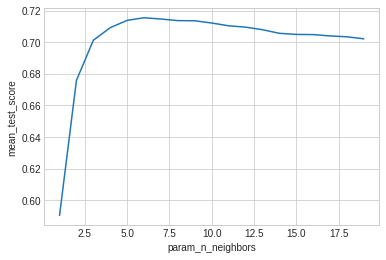

In [197]:
# KNN Regressor
knn = KNeighborsRegressor(n_jobs = jobs)

num = list(range(1,20))
# Create hyperparameter tuning values
param_grid = {'n_neighbors' : num}

# Create grid search using 5-fold cross validation
knn_grid = GridSearchCV(knn, param_grid, cv=kfold, refit=True, verbose=1, return_train_score=True, scoring='r2', n_jobs = jobs)

# Fit the model for grid search
knn_fit_model = knn_grid.fit(X_train_scale, Y_train)

# Plotting the avg test score v/s hyperparameter
sns.lineplot(x='param_n_neighbors', y='mean_test_score', data=pd.DataFrame(knn_grid.cv_results_))

# Print the score results and parameters for the best model
print("The best score of Grid search for KNN is  {0:.4f}".format(knn_grid.best_score_))
print("The best estimator of Grid search for KNN is ",knn_grid.best_estimator_)

From the above lineplot, we see that for n_neighbors = 6 we get the best KNN model. The best score of grid search for KNN model is 0.7155.

In [198]:
results_knn = pd.DataFrame(knn_grid.cv_results_)
results_knn.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.073637,0.022170,0.267894,0.100752,1,{'n_neighbors': 1},0.612763,0.558802,0.569536,0.592682,0.618658,0.590488,0.023399,19,0.999900,0.999919,0.999893,0.999867,0.999908,0.999897,0.000017
1,0.108108,0.044874,0.387148,0.068328,2,{'n_neighbors': 2},0.711895,0.658103,0.642762,0.648120,0.718633,0.675903,0.032583,18,0.898228,0.893347,0.898658,0.898752,0.896339,0.897065,0.002054
2,0.240989,0.090336,0.400933,0.012091,3,{'n_neighbors': 3},0.721943,0.684409,0.674233,0.700861,0.724803,0.701250,0.019983,17,0.848715,0.855955,0.855655,0.854648,0.851294,0.853253,0.002809
3,0.132001,0.064658,0.404114,0.051298,4,{'n_neighbors': 4},0.721835,0.700707,0.679645,0.713771,0.730022,0.709196,0.017662,9,0.832073,0.830670,0.833097,0.830078,0.827005,0.830585,0.002079
4,0.209307,0.062176,0.288161,0.047037,5,{'n_neighbors': 5},0.718742,0.716575,0.678531,0.719506,0.735693,0.713809,0.018910,3,0.813694,0.815244,0.819723,0.811820,0.813228,0.814742,0.002720


In [199]:
results_knn.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'], dtype='object')

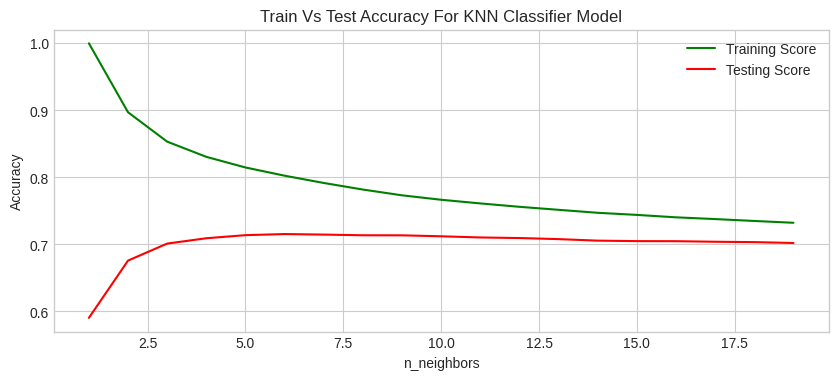

In [200]:
fig = plt.figure(figsize=(10,4),dpi=100)
plt.plot(results_knn['param_n_neighbors'],results_knn['mean_train_score'],color='green',label='Training Score')
plt.plot(results_knn['param_n_neighbors'],results_knn['mean_test_score'],color='red',label='Testing Score')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.title('Train Vs Test Accuracy For KNN Classifier Model')
plt.legend()

Again from the above plot we see that, for n_neighbor=6 we get the best KNN model

### Checking the score on best parameter for KNN Model

In [201]:
# Fit the KNN regression model
knn1 = KNeighborsRegressor(n_neighbors=6, n_jobs = jobs)
knn1.fit(X_train_scale,Y_train)

KNeighborsRegressor(n_jobs=10, n_neighbors=6)

In [202]:
#Cross validation train and test scores
knn_scores_train= cross_val_score(knn1,X_train_scale,Y_train,cv=kfold,scoring='r2', n_jobs = jobs)
print('Average Train Score of KNN model from Cross Validation: {0:.4f}'.format(knn_scores_train.mean()))
knn_scores_test = cross_val_score(knn1,X_test_scale,Y_test,cv=kfold,scoring='r2', n_jobs = jobs)
print('Average Test Score of KNN model from Cross Validation:  {0:.4f}'.format(knn_scores_test.mean()))

Average Train Score of KNN model from Cross Validation: 0.7155
Average Test Score of KNN model from Cross Validation:  0.6883


### 2. Linear Regression

In [203]:
# Fit the linear regression model 
lin_reg = LinearRegression()
lin_reg.fit(X_train_scale, Y_train)

LinearRegression()

In [204]:
# train and test scores for linear regression
print("Train and Test scores for linear regression model:")
print("Train Score: {0:.4f}".format(lin_reg.score(X_train_scale, Y_train)))
print("Test Score: {0:.4f}".format(lin_reg.score(X_test_scale, Y_test)))

#Cross validation train and test scores
linreg_scores_train = cross_val_score(lin_reg,X_train_scale,Y_train,cv=kfold,scoring='r2', n_jobs = jobs)
print('Average Train Score for Linear Regression from Cross Validation: {0:.4f}'.format(linreg_scores_train.mean()))
linreg_scores_test = cross_val_score(lin_reg,X_test_scale,Y_test,cv=kfold,scoring='r2', n_jobs = jobs)
print('Average Test Score for Linear Regression from Cross Validation: {0:.4f}'.format(linreg_scores_test.mean()))

Train and Test scores for linear regression model:
Train Score: 0.6407
Test Score: 0.6357
Average Train Score for Linear Regression from Cross Validation: 0.6376
Average Test Score for Linear Regression from Cross Validation: 0.6288


Thus from the above linear regression model, we get the average training score from cross validation as 0.6376 and average testing score as 0.6288

### 3. Ridge

The best score of Grid search for Ridge is 0.6377
The best estimator of Grid search for Ridge is  Ridge(alpha=1)


<AxesSubplot:xlabel='param_alpha', ylabel='mean_test_score'>

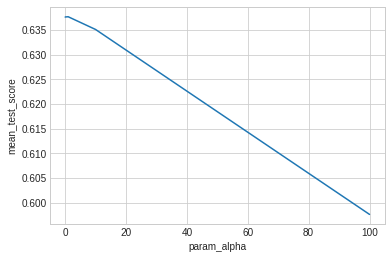

In [205]:
# Grid search & Graphical representation of alpha paramter and train-test scores
# Create hyperparameter tuning values
param_grid1 = {'alpha' : [0.01, 0.1, 1, 10, 100]}

# create and fit a ridge regression model, testing each alpha
model_ridge = Ridge()

# Fit the model for grid search
ridge_grid = GridSearchCV(model_ridge, param_grid1,scoring ="r2",cv=kfold,return_train_score=True, n_jobs = jobs)
ridge_grid.fit(X_train_scale,Y_train)

# Print the score results and parameters for the best model
print("The best score of Grid search for Ridge is {0:.4f}".format(ridge_grid.best_score_))
print("The best estimator of Grid search for Ridge is ",ridge_grid.best_estimator_)

# Plotting the avg test score v/s hyperparameter C
sns.lineplot(x='param_alpha', y='mean_test_score', data=pd.DataFrame(ridge_grid.cv_results_))

In [206]:
results_ridge = pd.DataFrame(ridge_grid.cv_results_)
results_ridge.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004466,0.000820,0.001771,0.000251,0.01,{'alpha': 0.01},0.632463,0.634884,0.629993,0.656002,0.634887,0.637646,0.009355,3,0.642679,0.641494,0.642829,0.636925,0.641457,0.641077,0.002154
1,0.004825,0.000320,0.001821,0.000236,0.1,{'alpha': 0.1},0.632430,0.635051,0.629884,0.656010,0.634957,0.637666,0.009366,2,0.642677,0.641491,0.642828,0.636924,0.641455,0.641075,0.002154
2,0.003708,0.000477,0.001605,0.000248,1,{'alpha': 1},0.632052,0.636300,0.628789,0.656002,0.635415,0.637712,0.009523,1,0.642545,0.641314,0.642705,0.636791,0.641302,0.640931,0.002153
3,0.004257,0.000392,0.001931,0.000018,10,{'alpha': 10},0.627736,0.638689,0.620409,0.654243,0.634556,0.635126,0.011399,4,0.639092,0.637347,0.639737,0.633357,0.637619,0.637431,0.002224
4,0.003952,0.000604,0.001475,0.000333,100,{'alpha': 100},0.582531,0.614507,0.570658,0.619606,0.600694,0.597599,0.018615,5,0.599240,0.596422,0.602185,0.593528,0.598167,0.597908,0.002882


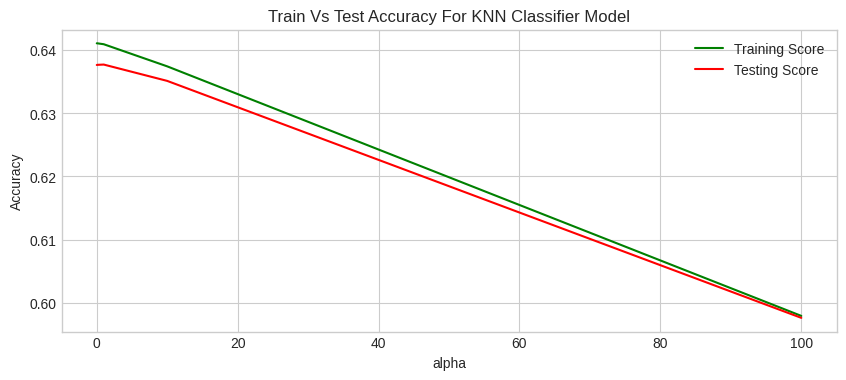

In [207]:
fig = plt.figure(figsize=(10,4),dpi=100)
plt.plot(results_ridge['param_alpha'],results_ridge['mean_train_score'],color='green',label='Training Score')
plt.plot(results_ridge['param_alpha'],results_ridge['mean_test_score'],color='red',label='Testing Score')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.title('Train Vs Test Accuracy For KNN Classifier Model')
plt.legend()

Thus from the above analysis we see that, the best ridge regression model is at alpha= 1 with best score as 0.6377

### Checking the score on best parameter for Ridge Regression Model

In [208]:
# Fit the Ridge Regression Model
model_ridge = Ridge(alpha=1)
model_ridge.fit(X_train_scale, Y_train)

Ridge(alpha=1)

In [209]:
#Cross validation train and test scores
ridge_scores_train = cross_val_score(model_ridge,X_train_scale,Y_train,cv=kfold,scoring='r2', n_jobs = jobs)
print('Average Train Score for ridge regression from Cross Validation: {0:.4f}'.format(ridge_scores_train.mean()))
ridge_scores_test = cross_val_score(model_ridge,X_test_scale,Y_test,cv=kfold,scoring='r2', n_jobs = jobs)
print('Average Test Score for ridge regression from Cross Validation: {0:.4f}'.format(np.mean(ridge_scores_test.mean())))

Average Train Score for ridge regression from Cross Validation: 0.6377
Average Test Score for ridge regression from Cross Validation: 0.6293


### 4. Lasso

The best score of Grid search for Lasso is 0.6376
The best estimator of Grid search for Lasso is  Lasso(alpha=10)


<AxesSubplot:xlabel='param_alpha', ylabel='mean_test_score'>

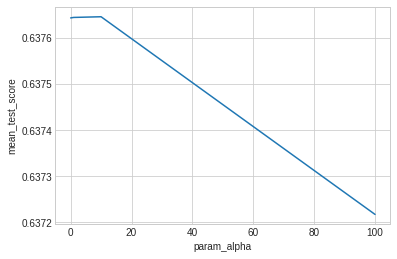

In [210]:
# Grid search & Graphical representation of alpha paramter and train-test scores

param_grid2 = {'alpha' : [0.01, 0.1, 1, 10, 100]}

# create and fit a lasso regression model, testing each alpha
model_lasso = Lasso()
lasso_grid = GridSearchCV(model_lasso, param_grid2, scoring ="r2", return_train_score=True, cv=kfold, n_jobs = jobs)
lasso_grid.fit(X_train_scale,Y_train)

#print the best score and parameters for best model
print("The best score of Grid search for Lasso is {0:.4f}".format(lasso_grid.best_score_))
print("The best estimator of Grid search for Lasso is ",lasso_grid.best_estimator_)

sns.lineplot(x='param_alpha', y='mean_test_score', data=pd.DataFrame(lasso_grid.cv_results_))

In [211]:
results_lasso = pd.DataFrame(lasso_grid.cv_results_)
results_lasso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.019316,0.006103,0.003329,0.000760,0.01,{'alpha': 0.01},0.632467,0.634865,0.630006,0.656001,0.634879,0.637643,0.009354,4,0.642679,0.641494,0.642829,0.636925,0.641457,0.641077,0.002154
1,0.015809,0.004072,0.002496,0.000486,0.1,{'alpha': 0.1},0.632466,0.634867,0.630005,0.656001,0.634879,0.637644,0.009354,3,0.642679,0.641494,0.642829,0.636925,0.641457,0.641077,0.002154
2,0.010273,0.001060,0.001724,0.000394,1,{'alpha': 1},0.632456,0.634889,0.630000,0.655996,0.634882,0.637645,0.009353,2,0.642679,0.641494,0.642829,0.636925,0.641457,0.641077,0.002154
3,0.011400,0.002725,0.001697,0.000356,10,{'alpha': 10},0.632353,0.635095,0.629936,0.655943,0.634903,0.637646,0.009341,1,0.642671,0.641485,0.642821,0.636917,0.641449,0.641069,0.002154
4,0.008332,0.001678,0.001557,0.000336,100,{'alpha': 100},0.631393,0.636336,0.628839,0.655223,0.634295,0.637217,0.009356,5,0.642146,0.640769,0.642139,0.636374,0.640781,0.640442,0.002124


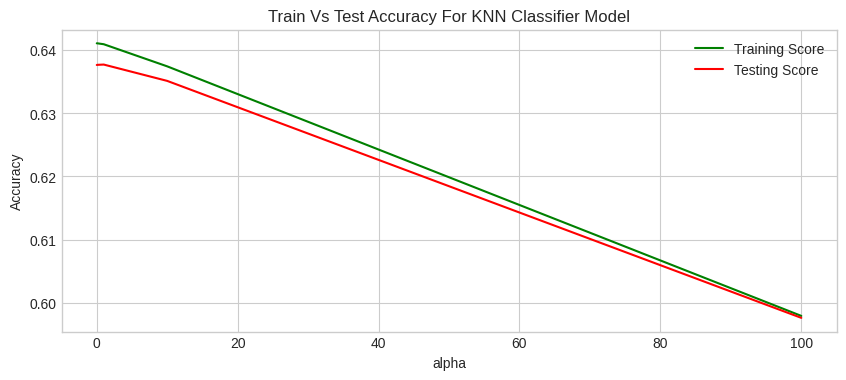

In [212]:
fig = plt.figure(figsize=(10,4),dpi=100)
plt.plot(results_lasso['param_alpha'],results_ridge['mean_train_score'],color='green',label='Training Score')
plt.plot(results_lasso['param_alpha'],results_ridge['mean_test_score'],color='red',label='Testing Score')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.title('Train Vs Test Accuracy For KNN Classifier Model')
plt.legend()

Thus from the above analysis we see that, the best lasso regression model is at alpha= 10 with best score as 0.6376

### Checking the score on best parameter for Lasso Regression Model

In [213]:
# Fit the Lasso Regression Model
model_lasso1 = Lasso(alpha=10)
model_lasso1.fit(X_train_scale, Y_train)

Lasso(alpha=10)

In [214]:
#Cross validation train and test scores
lasso_scores_train = cross_val_score(model_lasso1,X_train_scale,Y_train,cv=kfold,scoring='r2', n_jobs = jobs)
print('Average Train Score for ridge regression from Cross Validation: {0:.4f}'.format(lasso_scores_train.mean()))
lasso_scores_test = cross_val_score(model_lasso1,X_test_scale,Y_test,cv=kfold,scoring='r2', n_jobs = jobs)
print('Average Test Score for ridge regression from Cross Validation: {0:.4f}'.format(lasso_scores_test.mean()))

Average Train Score for ridge regression from Cross Validation: 0.6376
Average Test Score for ridge regression from Cross Validation: 0.6289


### 5. Polynomial Regression

Best score for Polynomial features: 0.7116
Best parameters for Polynomial Features: {'Polynomial degree': 2}


Text(0.5, 0, 'Polynomial degree')

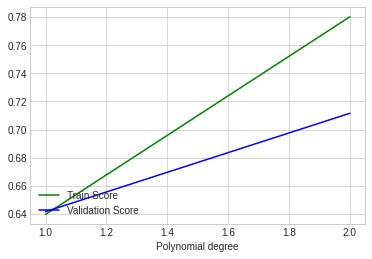

In [215]:
# Naive Grid search & Graphical representation of alpha paramter and train-test scores

x_train, x_valid, y_train, y_valid = train_test_split(X_train_scale,Y_train,random_state=0)
x_train = pd.DataFrame(scaler.fit_transform(x_train))
x_valid = pd.DataFrame(scaler.transform(x_valid))

train_score_list = []
test_score_list = []
x_range = [1,2]

best_score=0
for num in range(1,3):
    poly = PolynomialFeatures(num)
    X_train_poly = poly.fit_transform(x_train)
    X_test_poly = poly.transform(x_valid)
    lin_reg.fit(X_train_poly, y_train)
    train_score_list.append(lin_reg.score(X_train_poly, y_train))
    score=lin_reg.score(X_test_poly, y_valid)
    test_score_list.append((score))
    if score > best_score:
        best_score = score
        best_parameters = {'Polynomial degree': num}

print("Best score for Polynomial features: {0:.4f}".format(best_score))
print("Best parameters for Polynomial Features: {}".format(best_parameters))

%matplotlib inline
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Validation Score')
plt.legend(loc = 3)
plt.xlabel('Polynomial degree')

Thus from the above analysis we get that for degree =2 we get the best polynomial regression model with best score 0.7116

### Checking the score on best parameter for Polynomial Regression Model

In [216]:
# polynomial regression with cross validation
lin_reg1 = LinearRegression()
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(X_train_scale)

poly_scores_train = cross_val_score(lin_reg1,x_train_poly,Y_train,cv=kfold,scoring='r2', n_jobs = jobs)
print('Average Train Score for polynomial regression from Cross Validation: {0:.4f}'.format(poly_scores_train.mean()))
x_test_poly = poly.fit_transform(X_test_scale)
poly_scores_test = cross_val_score(lin_reg1,x_test_poly,Y_test,cv=5,scoring='r2', n_jobs = jobs)
print('Average Test Score for polynomial regression from Cross Validation: {0:.4f}'.format(poly_scores_test.mean()))

Average Train Score for polynomial regression from Cross Validation: 0.7421
Average Test Score for polynomial regression from Cross Validation: 0.7120


### 6. Simple SVM

The best score of Grid search for SVR is 0.4231
The best estimator of Grid search for Simple SVM is  LinearSVR(C=1000)


<AxesSubplot:xlabel='param_C', ylabel='mean_test_score'>

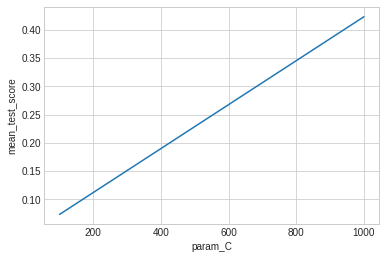

In [217]:
# Grid search & Graphical representation of alpha paramter and train-test scores
#create hyperparameter for grid search, C
param_grid3 = {'C' : [100,1000]}

# create and fit a svr regression model, testing each C
svr_model = LinearSVR()

svr_grid = GridSearchCV(svr_model, param_grid3 ,scoring ="r2", return_train_score=True, refit=True, n_jobs = jobs)
svr_grid.fit(X_train_scale,Y_train)

print("The best score of Grid search for SVR is {0:.4f}".format(svr_grid.best_score_))
print("The best estimator of Grid search for Simple SVM is ",svr_grid.best_estimator_)

sns.lineplot(x='param_C', y='mean_test_score', data=pd.DataFrame(svr_grid.cv_results_))

In [218]:
results_svr = pd.DataFrame(svr_grid.cv_results_)
results_svr.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.019583,0.002297,0.003019,0.000342,100,{'C': 100},0.055612,0.075320,0.068349,0.091779,0.074336,0.073079,0.011694,2,0.074659,0.072701,0.073128,0.069647,0.073373,0.072702,0.001661
1,0.018235,0.003900,0.002397,0.000087,1000,{'C': 1000},0.401064,0.441123,0.396141,0.450499,0.426752,0.423115,0.021453,1,0.426353,0.414200,0.427640,0.420300,0.422048,0.422108,0.004784


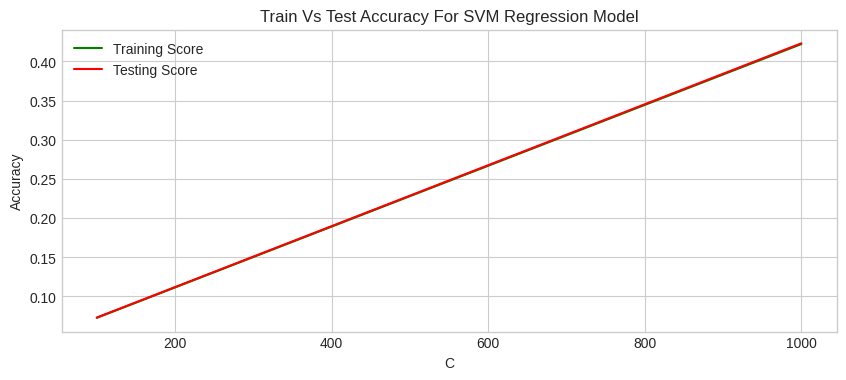

In [219]:
fig = plt.figure(figsize=(10,4),dpi=100)
plt.plot(results_svr['param_C'],results_svr['mean_train_score'],color='green',label='Training Score')
plt.plot(results_svr['param_C'],results_svr['mean_test_score'],color='red',label='Testing Score')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Train Vs Test Accuracy For SVM Regression Model')
plt.legend()

Thus from the above analysis we see that, for C=1000 we get the best SVM model with best score of 0.4240

### Checking the score on best parameter for simple SVM Model

In [220]:
# Fit the SVM Model
svr_model1 = LinearSVR(C=1000)
svr_model1.fit(X_train_scale,Y_train)

LinearSVR(C=1000)

In [221]:
# SVM simple with cross validation
svr_scores_train = cross_val_score(svr_model1,X_train_scale,Y_train,cv=kfold,scoring='r2', n_jobs = jobs)
print('Average Train Score for SVM from Cross Validation: {0:.4f}'.format(svr_scores_train.mean()))
svr_scores_test = cross_val_score(svr_model1,X_test_scale,Y_test,cv=kfold,scoring='r2', n_jobs = jobs)
print('Average Test Score for SVM from Cross Validation: {0:.4f}'.format(svr_scores_test.mean()))

Average Train Score for SVM from Cross Validation: 0.4240
Average Test Score for SVM from Cross Validation: 0.2495


### 7. SVM with Linear Kernel

Fitting 5 folds for each of 9 candidates, totalling 45 fits
The best score of Grid search for Linear SVR is 0.4256
The best estimator of Grid search for Linear SVR is  SVR(C=1000, gamma=100, kernel='linear')


<AxesSubplot:xlabel='param_C', ylabel='mean_test_score'>

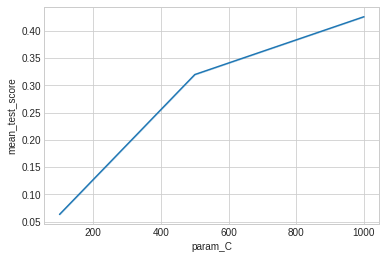

In [222]:
# Grid search & Graphical representation of C and gamma paramter and train-test scores

param_grid4 = {'C' : [100, 500, 1000],
               'gamma' : [100, 500, 1000]}
# create and fit a SVM with linear kernel regression model, testing each C and gamma
lin_svr_model = SVR(kernel='linear')
lin_svr_grid = GridSearchCV(lin_svr_model, param_grid4,scoring ="r2", return_train_score=True, verbose=5, n_jobs = jobs)
lin_svr_grid.fit(X_train_scale,Y_train)

print("The best score of Grid search for Linear SVR is {0:.4f}".format(lin_svr_grid.best_score_))
print("The best estimator of Grid search for Linear SVR is ",lin_svr_grid.best_estimator_)

sns.lineplot(x='param_C', y='mean_test_score', data=pd.DataFrame(lin_svr_grid.cv_results_))

Thus we see that, for C=1000, gamma=100, kernel='linear', we get the best SVM model with linear kernel with best score as 0.4256

### Checking the score on best parameter for SVM Model with linear kernel

In [223]:
# Fit the SVM Model with linear kernel
lin_svr_model1 = SVR(kernel="linear",C=1000,gamma = 100)
lin_svr_model1.fit(X_train_scale,Y_train)

SVR(C=1000, gamma=100, kernel='linear')

In [224]:
# Linear kernel with cross validation
lin_svr_scores_train = cross_val_score(lin_svr_model1,X_train_scale,Y_train,cv=kfold,scoring='r2', n_jobs = jobs)
print('Average Train Score for SVR with linear kernel from Cross Validation: {0:.4f}'.format(lin_svr_scores_train.mean()))
lin_svr_scores_test = cross_val_score(lin_svr_model1,X_test_scale,Y_test,cv=kfold,scoring='r2', n_jobs = jobs)
print('Average Test Score for SVR with linear kernel from Cross Validation: {0:.4f}'.format(lin_svr_scores_test.mean()))

Average Train Score for SVR with linear kernel from Cross Validation: 0.4256
Average Test Score for SVR with linear kernel from Cross Validation: 0.2454


### 8. SVM with RBF Kernel

Fitting 5 folds for each of 9 candidates, totalling 45 fits
The best score of Grid search for rbf SVR is -0.0319
The best estimator of Grid search for rbf SVR is  SVR(C=1000, gamma=100)


<AxesSubplot:xlabel='param_C', ylabel='mean_test_score'>

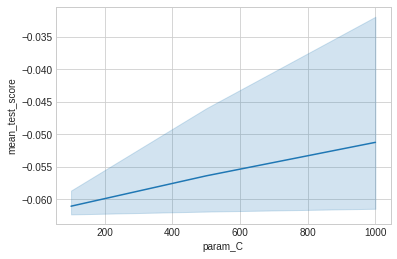

In [225]:
# Grid search & Graphical representation of alpha paramter and train-test scores
param_grid5 = {'C' : [100, 500, 1000],
             'gamma' : [100, 500, 1000]}
# create and fit a svr model with rbf kernel
rbf_svr_model = SVR(kernel="rbf")
rbf_svr_grid = GridSearchCV(estimator=rbf_svr_model, param_grid=param_grid5,scoring ="r2",verbose=5, n_jobs = jobs)
rbf_svr_grid.fit(X_train_scale,Y_train)
print("The best score of Grid search for rbf SVR is {0:.4f}".format(rbf_svr_grid.best_score_))
print("The best estimator of Grid search for rbf SVR is ",rbf_svr_grid.best_estimator_)

sns.lineplot(x='param_C', y='mean_test_score', data=pd.DataFrame(rbf_svr_grid.cv_results_))

### Checking the score on best parameter for SVM Model with rbf kernel

In [226]:
# Fit the SVM Model with rbf kernel
rbf_svr_model1 = SVR(kernel="rbf",C=1000,gamma = 100)
rbf_svr_model1.fit(X_train_scale,Y_train)

SVR(C=1000, gamma=100)

In [227]:
# rbf kernel with cross validation
rbf_svr_scores_train = cross_val_score(rbf_svr_model1,X_train_scale,Y_train,cv=kfold,scoring='r2', n_jobs = jobs)
print('Average Train Score for SVR with rbf kernel from Cross Validation: {0:.4f}'.format(rbf_svr_scores_train.mean()))
rbf_svr_scores_test = cross_val_score(rbf_svr_model1,X_test_scale,Y_test,cv=kfold,scoring='r2', n_jobs = jobs)
print('Average Test Score for SVR with rbf kernel from Cross Validation: {0:.4f}'.format(rbf_svr_scores_train.mean()))

Average Train Score for SVR with rbf kernel from Cross Validation: -0.0319
Average Test Score for SVR with rbf kernel from Cross Validation: -0.0319


### 9. SVM with poly kernel

Fitting 5 folds for each of 9 candidates, totalling 45 fits
The best score of Grid search for Poly SVR is 0.6019
The best estimator of Grid search for Poly SVR is  SVR(C=1000, kernel='poly')


<AxesSubplot:xlabel='param_C', ylabel='mean_test_score'>

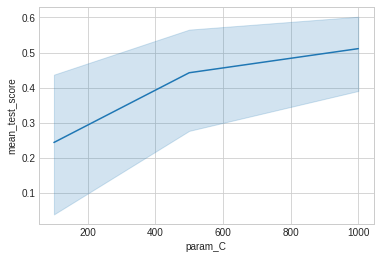

In [228]:
# Grid search & Graphical representation of alpha paramter and train-test scores
param_grid6 = {'C' : [100, 500, 1000],
             'degree' : [1,2,3]}
# create and fit a ridge regression model, testing each alpha
poly_svr_model = SVR(kernel="poly")
poly_svr_grid = GridSearchCV(estimator=poly_svr_model, param_grid=param_grid6,scoring ="r2",verbose=5, n_jobs = jobs)
poly_svr_grid.fit(X_train_scale,Y_train)
print("The best score of Grid search for Poly SVR is {0:.4f}".format(poly_svr_grid.best_score_))
print("The best estimator of Grid search for Poly SVR is ",poly_svr_grid.best_estimator_)

sns.lineplot(x='param_C', y='mean_test_score', data=pd.DataFrame(poly_svr_grid.cv_results_))

In [229]:
print("The best parameters of Grid search for Poly SVR is ",poly_svr_grid.best_params_)

The best parameters of Grid search for Poly SVR is  {'C': 1000, 'degree': 3}


Thus we see that, for C=1000, kernel='poly', degree=3, we get the best SVM model with poly kernel with best score as 0.6019

### Checking the score on best parameter for SVM Model with poly kernel

In [230]:
# Fit the SVM Model with poly kernel
poly_svr_model1 = SVR(kernel="poly",C=1000, degree=3)
poly_svr_model1.fit(X_train_scale,Y_train)

SVR(C=1000, kernel='poly')

In [231]:
# poly kernel with cross validation
poly_svr_scores_train = cross_val_score(poly_svr_model1,X_train_scale,Y_train,cv=5,scoring='r2')
print('Average Train Score for SVR with poly kernel from Cross Validation: {0:.4f}'.format(poly_svr_scores_train.mean()))
poly_svr_scores_test = cross_val_score(poly_svr_model1,X_test_scale,Y_test,cv=5,scoring='r2')
print('Average Test Score for SVR with poly kernel from Cross Validation: {0:.4f}'.format(poly_svr_scores_test.mean()))

Average Train Score for SVR with poly kernel from Cross Validation: 0.6019
Average Test Score for SVR with poly kernel from Cross Validation: 0.4946


### 10. Decision Tree Regressor

In [232]:
# create a regressor object 
param_grid7 = {"min_samples_split": [2, 10],
              "max_depth": [2,5,10,25,50]
              }

# create and fit a decision tree regressor
dec_tree_model = DecisionTreeRegressor()
dec_tree_grid = GridSearchCV(estimator=dec_tree_model, param_grid=param_grid7,scoring ="r2",verbose=5,return_train_score=True, n_jobs = jobs)
dec_tree_grid.fit(X_train_scale,Y_train)
print("The best score of Grid search for decision tree regressor is {0:.4f}".format(dec_tree_grid.best_score_))
print("The best estimator of Grid search for decision tree regressor is ",dec_tree_grid.best_estimator_)
print("The best parameters of Grid search for decision tree regressor is ",dec_tree_grid.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best score of Grid search for decision tree regressor is 0.6735
The best estimator of Grid search for decision tree regressor is  DecisionTreeRegressor(max_depth=10, min_samples_split=10)
The best parameters of Grid search for decision tree regressor is  {'max_depth': 10, 'min_samples_split': 10}


### Checking the score on best parameter for Decision Tree Regressor Model

In [233]:
# fit the regressor with X and Y data 
dec_tree_model1 = DecisionTreeRegressor(max_depth=10, min_samples_split=10)
dec_tree_model1.fit(X_train_scale, Y_train) 

DecisionTreeRegressor(max_depth=10, min_samples_split=10)

In [234]:
dec_tree_scores_train = cross_val_score(dec_tree_model1,X_train_scale,Y_train,cv=5,scoring='r2', n_jobs = jobs)
print('Average Train Score for decision tree regressor from Cross Validation: {0:.4f}'.format(dec_tree_scores_train.mean()))
dec_tree_scores_test = cross_val_score(dec_tree_model1,X_test_scale,Y_test,cv=5,scoring='r2', n_jobs = jobs)
print('Average Test Score for decision tree regressor from Cross Validation: {0:.4f}'.format(dec_tree_scores_test.mean()))

Average Train Score for decision tree regressor from Cross Validation: 0.6761
Average Test Score for decision tree regressor from Cross Validation: 0.6367


In [235]:
results_dec_tree = pd.DataFrame(dec_tree_grid.cv_results_)
results_dec_tree.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.023720,0.006413,0.002428,0.000749,2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.444665,0.412724,0.448022,0.393674,0.408879,0.421593,0.021216,9,0.442446,0.443737,0.441211,0.445077,0.450049,0.444504,0.003058
1,0.021760,0.005557,0.001928,0.000357,2,10,"{'max_depth': 2, 'min_samples_split': 10}",0.444665,0.412724,0.448022,0.393674,0.408879,0.421593,0.021216,9,0.442446,0.443737,0.441211,0.445077,0.450049,0.444504,0.003058
2,0.031956,0.001391,0.001392,0.000159,5,2,"{'max_depth': 5, 'min_samples_split': 2}",0.641461,0.546454,0.679817,0.544484,0.620843,0.606612,0.053395,6,0.701559,0.712155,0.692840,0.692970,0.697551,0.699415,0.007144
3,0.033123,0.002655,0.001547,0.000278,5,10,"{'max_depth': 5, 'min_samples_split': 10}",0.640855,0.576769,0.679774,0.590600,0.619957,0.621591,0.036684,5,0.700079,0.709317,0.687688,0.685542,0.695860,0.695697,0.008626
4,0.059104,0.004333,0.001616,0.000197,10,2,"{'max_depth': 10, 'min_samples_split': 2}",0.686776,0.617291,0.729990,0.668309,0.613476,0.663168,0.043870,2,0.880771,0.886194,0.874864,0.875791,0.888954,0.881315,0.005560


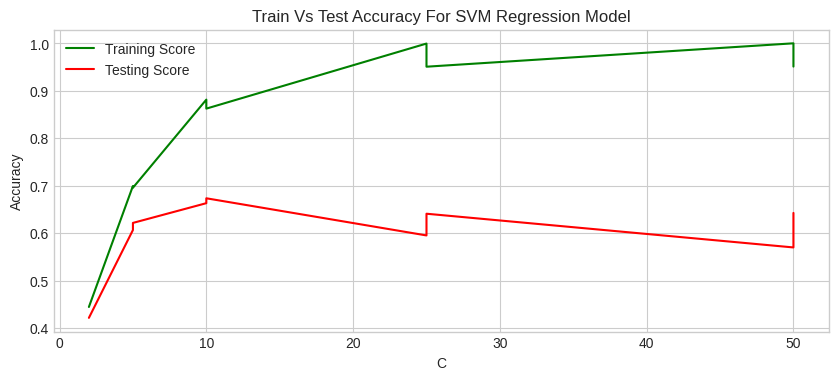

In [236]:
fig = plt.figure(figsize=(10,4),dpi=100)
plt.plot(results_dec_tree['param_max_depth'],results_dec_tree['mean_train_score'],color='green',label='Training Score')
plt.plot(results_dec_tree['param_max_depth'],results_dec_tree['mean_test_score'],color='red',label='Testing Score')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Train Vs Test Accuracy For SVM Regression Model')
plt.legend()

From the above anallysis, we see that, for 'max_depth': 10, 'min_samples_split': 10, we get the best decision tree regressor model with best score as 0.6723

## Comparing different models

In [237]:
model_dictionary = { 'regressors': ['KNN','Linear Regression','Ridge',
                                    'Lasso','Polynomial Regression','Simple SVR',
                                    'linear SVR','rbf SVR','poly SVR','Decision Tree Regressor'],
                    'scores' : [knn_scores_train.mean(), linreg_scores_train.mean(),ridge_scores_train.mean(),
                                lasso_scores_train.mean(),poly_scores_train.mean(),svr_scores_train.mean(),
                                lin_svr_scores_train.mean(),rbf_svr_scores_train.mean(),poly_svr_scores_train.mean(),
                                dec_tree_scores_test.mean()]}
models_df = pd.DataFrame(model_dictionary)
models_df


,regressors,scores
0,KNN,0.715460
1,Linear Regression,0.637643
2,Ridge,0.637712
3,Lasso,0.637646
4,Polynomial Regression,0.742110
5,Simple SVR,0.423974
6,linear SVR,0.425643
7,rbf SVR,-0.031910
8,poly SVR,0.601914
9,Decision Tree Regressor,0.636664


### Sorted list of applied models

In [238]:
models_df = models_df.sort_values(by='scores',ascending=False)
models_df

,regressors,scores
4,Polynomial Regression,0.742110
0,KNN,0.715460
2,Ridge,0.637712
3,Lasso,0.637646
1,Linear Regression,0.637643
9,Decision Tree Regressor,0.636664
8,poly SVR,0.601914
6,linear SVR,0.425643
5,Simple SVR,0.423974
7,rbf SVR,-0.031910


<AxesSubplot:xlabel='regressors', ylabel='scores'>

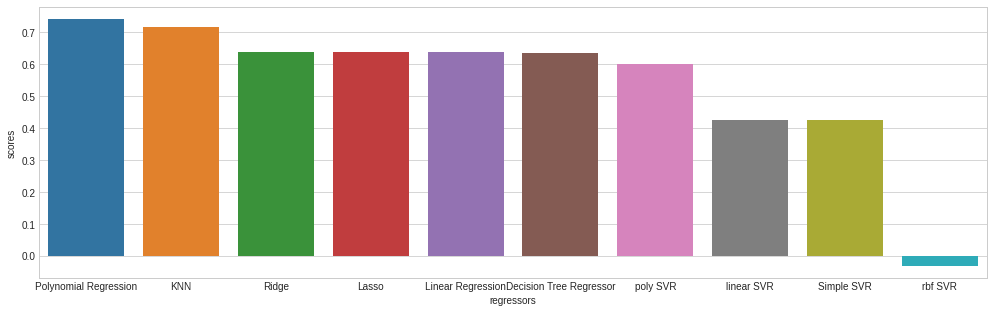

In [239]:
fig = plt.figure(figsize=(17,5))
sns.barplot(x='regressors',y='scores',data=models_df)

From the above analysis we see that, Polynomial Regression is the best model.

## Applying prediction using the best model identified (Polynomial Regression)

In [240]:
# polynomial regression with best parameters
lin_reg1 = LinearRegression()
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(X_train_scale)

poly_scores_train = cross_val_score(lin_reg1,x_train_poly,Y_train,cv=kfold,scoring='r2', n_jobs = jobs)
print('Average Train Score for polynomial regression from Cross Validation: {0:.4f}'.format(poly_scores_train.mean()))
x_test_poly = poly.fit_transform(X_test_scale)
poly_scores_test = cross_val_score(lin_reg1,x_test_poly,Y_test,cv=5,scoring='r2', n_jobs = jobs)
print('Average Test Score for polynomial regression from Cross Validation: {0:.4f}'.format(poly_scores_test.mean()))

Average Train Score for polynomial regression from Cross Validation: 0.7421
Average Test Score for polynomial regression from Cross Validation: 0.7120


Thus after applying these models we get the best model as polynomial regression with average train accuracy as 0.7421 and average test accuracy as 0.7121

## Regression Project Part 2

## Applying 2 models with bagging and pasting

Models on which bagging would be performed -

1. K-Nearest Neighbor
2. Ridge

### Applying Bagging


### 1. K-Nearest Neighbor Model

In [242]:
grid_params_bag1 = {'n_estimators':[10,40,70],
                    'max_samples':[0.1, 0.2, 0.5],
                    'max_features':[0.1, 0.2, 0.5],
                    'bootstrap':[True]}
kfold = KFold(n_splits=5)

knn_model = KNeighborsRegressor(n_neighbors=6)
bag_reg_knn = BaggingRegressor(knn_model, n_jobs=jobs, random_state=0)
grid_knn_bag = GridSearchCV(bag_reg_knn,grid_params_bag1,cv=kfold,verbose=3, return_train_score=True, n_jobs = jobs)
grid_knn_bag.fit(X_train_scale,Y_train)

# Print the score results and parameters for the best model
print("The best score of Grid search for KNN for bagging regressor is  {0:.4f}".format(grid_knn_bag.best_score_))
print("The best estimator of Grid search for KNN for bagging regressor is ",grid_knn_bag.best_estimator_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
The best score of Grid search for KNN for bagging regressor is  0.7033
The best estimator of Grid search for KNN for bagging regressor is  BaggingRegressor(base_estimator=KNeighborsRegressor(n_neighbors=6),
                 max_features=0.5, max_samples=0.5, n_estimators=70, n_jobs=10,
                 random_state=0)


From the above analysis, we see that for max_features=0.5, max_samples=0.5, n_estimators=70 we get the best KNN model with bagging regressor. The best score is 0.7033.

In [243]:
output_results_knn = pd.DataFrame(grid_knn_bag.cv_results_)

<AxesSubplot:xlabel='param_max_samples', ylabel='mean_test_score'>

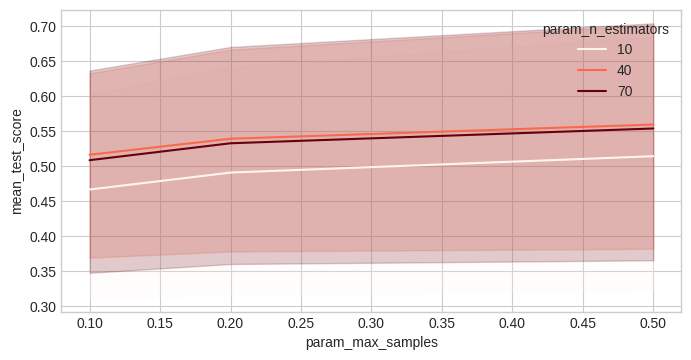

In [244]:
fig = plt.figure(figsize=(8,4),dpi=100)
sns.lineplot(x=output_results_knn['param_max_samples'],y=output_results_knn['mean_test_score'],hue=output_results_knn['param_n_estimators'],
            palette='Reds')



### Applying best parameters

In [245]:
bag_reg_knn1 = BaggingRegressor(KNeighborsRegressor(n_neighbors=6), bootstrap= True, max_features= 0.5, max_samples= 0.5, n_estimators= 70, n_jobs = jobs)
bag_reg_knn1.fit(X_train_scale, Y_train)

print('Train score: %.2f'%bag_reg_knn1.score(X_train_scale, Y_train))
print('Test score: %.2f'%bag_reg_knn1.score(X_test_scale, Y_test))

Train score: 0.74
Test score: 0.69


In [246]:
#Cross validation train and test scores
knn_bag_scores_train= cross_val_score(bag_reg_knn1,X_train_scale,Y_train,cv=kfold,scoring='r2', n_jobs = jobs)
print('Average Train Score of KNN model with bagging from Cross Validation: {0:.4f}'.format(knn_bag_scores_train.mean()))
knn_bag_scores_test = cross_val_score(bag_reg_knn1,X_test_scale,Y_test,cv=kfold,scoring='r2', n_jobs = jobs)
print('Average Test Score of KNN model with bagging from Cross Validation:  {0:.4f}'.format(knn_bag_scores_test.mean()))

Average Train Score of KNN model with bagging from Cross Validation: 0.7029
Average Test Score of KNN model with bagging from Cross Validation:  0.6517


In [247]:
print('The Best R Squared Value that we are getting is {}'.format(round(knn_bag_scores_train.mean(),4)))

The Best R Squared Value that we are getting is 0.7029


### 2. Ridge

In [249]:
grid_params_bag2 = {'n_estimators':[200, 300, 400, 500],
                    'max_samples':[0.05, 0.1, 0.2, 0.5,0.6,0.7,0.8],
                    'max_features':[0.1, 0.2, 0.5]}

kfold = KFold(n_splits=5)
ridge1 = Ridge(alpha=1, random_state=0)
bag_reg_ridge = BaggingRegressor(ridge1, bootstrap=True, random_state=0, n_jobs = jobs)

grid_ridge_bag = GridSearchCV(bag_reg_ridge,grid_params_bag2,cv=kfold,verbose=3, n_jobs = jobs)
grid_ridge_bag.fit(X_train_scale,Y_train)

# Print the score results and parameters for the best model
print("The best score of Grid search for ridge model for bagging regressor is  {0:.4f}".format(grid_ridge_bag.best_score_))
print("The best estimator of Grid search for KNN for bagging regressor is ",grid_ridge_bag.best_estimator_)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
The best score of Grid search for ridge model for bagging regressor is  0.5990
The best estimator of Grid search for KNN for bagging regressor is  BaggingRegressor(base_estimator=Ridge(alpha=1, random_state=0),
                 max_features=0.5, max_samples=0.8, n_estimators=500, n_jobs=10,
                 random_state=0)


From the above analysis, we see that for max_features=0.5, max_samples=0.8, n_estimators=500 we get the best ridge model with bagging regressor. The best score is 0.5990.

In [250]:
output_results_ridge = pd.DataFrame(grid_ridge_bag.cv_results_)

<AxesSubplot:xlabel='param_max_samples', ylabel='mean_test_score'>

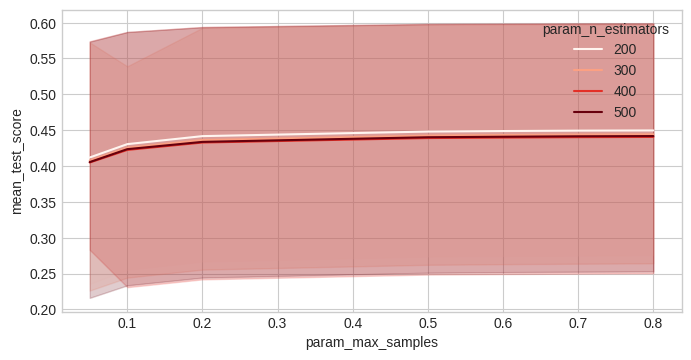

In [251]:
fig = plt.figure(figsize=(8,4),dpi=100)
sns.lineplot(x=output_results_ridge['param_max_samples'],y=output_results_ridge['mean_test_score'],hue=output_results_ridge['param_n_estimators'],
            palette='Reds')

### Applying best parameters

In [252]:
bag_reg_ridge1 = BaggingRegressor(Ridge(random_state=0,alpha=1.0), bootstrap= True, max_features= 0.5, max_samples= 0.8, n_estimators= 500, n_jobs = jobs)
bag_reg_ridge1.fit(X_train_scale, Y_train)

print('Train score: %.2f'%bag_reg_ridge1.score(X_train_scale, Y_train))
print('Test score: %.2f'%bag_reg_ridge1.score(X_test_scale, Y_test))

Train score: 0.60
Test score: 0.59


In [253]:
#Cross validation train and test scores
ridge_bag_scores_train= cross_val_score(bag_reg_ridge1,X_train_scale,Y_train,cv=kfold,scoring='r2', n_jobs = jobs)
print('Average Train Score of Ridge model with bagging from Cross Validation: {0:.4f}'.format(ridge_bag_scores_train.mean()))
ridge_bag_scores_test = cross_val_score(bag_reg_ridge1,X_test_scale,Y_test,cv=kfold,scoring='r2', n_jobs = jobs)
print('Average Test Score of Ridge model with bagging from Cross Validation:  {0:.4f}'.format(ridge_bag_scores_test.mean()))

Average Train Score of Ridge model with bagging from Cross Validation: 0.5998
Average Test Score of Ridge model with bagging from Cross Validation:  0.5860


In [254]:
print('The Best R Squared Value that we are getting is {}'.format(round(ridge_bag_scores_train.mean(),4)))

The Best R Squared Value that we are getting is 0.5998


## Applying Pasting

Models on which Pasting would be applied-
1. Decision Tree Regressor
2. Ridge

### 1. Decision Tree Regressor

In [255]:
grid_params_past1 = {'max_samples':[0.01, 0.1, 0.5, 1], 
                     'max_features':[0.01, 0.1, 0.5, 1],
                     'n_estimators':[200, 300, 400, 500],
                     'bootstrap':[False]}

dec_tree_past = DecisionTreeRegressor(max_depth=10)
past_reg_dectree = BaggingRegressor(dec_tree_past, n_jobs = jobs, random_state=0)

grid_dectree_past = GridSearchCV(past_reg_dectree,grid_params_past1,cv=kfold,verbose=3, n_jobs = jobs)
grid_dectree_past.fit(X_train_scale,Y_train)

# Print the score results and parameters for the best model
print("The best score of Grid search for Decision Tree Regressor model for pasting regressor is  {0:.4f}".format(grid_dectree_past.best_score_))
print("The best estimator of Grid search for Decision Tree Regressor model for pasting regressor is ",grid_dectree_past.best_estimator_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
The best score of Grid search for Decision Tree Regressor model for pasting regressor is  0.7568
The best estimator of Grid search for Decision Tree Regressor model for pasting regressor is  BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=10),
                 bootstrap=False, max_features=0.5, max_samples=0.5,
                 n_estimators=400, n_jobs=10, random_state=0)


From the above analysis, we see that for max_features=0.5, max_samples=0.5,
n_estimators=400 we get the best decision tree regressor model with pasting. The best score is 0.7568.

In [256]:
output_results_dectree = pd.DataFrame(grid_dectree_past.cv_results_)
output_results_dectree.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_features,param_max_samples,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.409910,0.016827,0.035376,0.002322,False,0.01,0.01,200,"{'bootstrap': False, 'max_features': 0.01, 'ma...",0.300401,0.338815,0.303366,0.331489,0.303823,0.315579,0.016191,34
1,0.608459,0.019258,0.054558,0.003631,False,0.01,0.01,300,"{'bootstrap': False, 'max_features': 0.01, 'ma...",0.288824,0.323859,0.283925,0.313456,0.291424,0.300298,0.015535,40
2,0.769527,0.021512,0.074194,0.006913,False,0.01,0.01,400,"{'bootstrap': False, 'max_features': 0.01, 'ma...",0.268820,0.301251,0.265061,0.294651,0.278275,0.281612,0.014173,46
3,0.968577,0.018360,0.095110,0.006716,False,0.01,0.01,500,"{'bootstrap': False, 'max_features': 0.01, 'ma...",0.272833,0.304396,0.263737,0.293748,0.278254,0.282593,0.014625,43
4,0.395585,0.007510,0.040129,0.009268,False,0.01,0.1,200,"{'bootstrap': False, 'max_features': 0.01, 'ma...",0.328429,0.369650,0.332057,0.369408,0.335235,0.346956,0.018556,16


<AxesSubplot:xlabel='param_max_samples', ylabel='mean_test_score'>

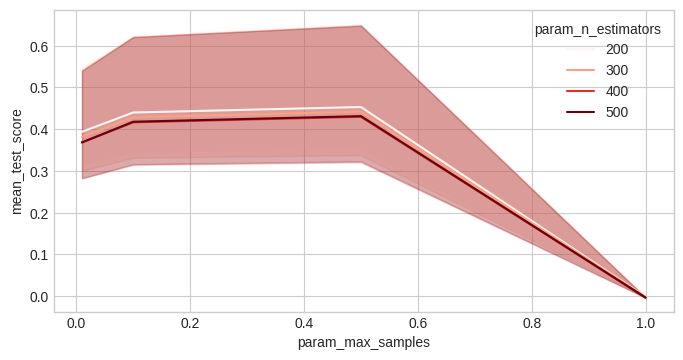

In [257]:
fig = plt.figure(figsize=(8,4),dpi=100)
sns.lineplot(x=output_results_dectree['param_max_samples'],y=output_results_dectree['mean_test_score'],hue=output_results_dectree['param_n_estimators'],
            palette='Reds')

### Applying best parameters

In [258]:
past_reg_dectree = BaggingRegressor(DecisionTreeRegressor(max_depth=10), bootstrap= False, max_features= 0.5, max_samples= 0.5, n_estimators= 400, n_jobs = jobs)
past_reg_dectree.fit(X_train_scale, Y_train)

print('Train score: %.2f'%past_reg_dectree.score(X_train_scale, Y_train))
print('Test score: %.2f'%past_reg_dectree.score(X_test_scale, Y_test))

Train score: 0.86
Test score: 0.76


In [259]:
#Cross validation train and test scores
dectree_past_scores_train= cross_val_score(past_reg_dectree,X_train_scale,Y_train,cv=kfold,scoring='r2', n_jobs = jobs)
print('Average Train Score of Decision Tree Regressor model with pasting from Cross Validation: {0:.4f}'.format(dectree_past_scores_train.mean()))
dectree_past_scores_test = cross_val_score(past_reg_dectree,X_test_scale,Y_test,cv=kfold,scoring='r2', n_jobs = jobs)
print('Average Test Score of Decision Tree Regressor model with pasting from Cross Validation:  {0:.4f}'.format(dectree_past_scores_test.mean()))

Average Train Score of Decision Tree Regressor model with pasting from Cross Validation: 0.7560
Average Test Score of Decision Tree Regressor model with pasting from Cross Validation:  0.7311


In [260]:
print('The Best R Squared Value that we are getting is {}'.format(round(dectree_past_scores_train.mean(),4)))

The Best R Squared Value that we are getting is 0.756


### 2. Ridge

In [261]:
grid_params_past2 = {'max_samples':[0.01, 0.1, 0.5, 1], 
                     'max_features':[0.01, 0.1, 0.5, 1],
                     'n_estimators':[200, 300, 400, 500],
                     'bootstrap':[False]}

ridge2 = Ridge(alpha=1, random_state=0)
past_reg_ridge = BaggingRegressor(ridge2, n_jobs = jobs, random_state=0)

grid_ridge_past = GridSearchCV(past_reg_ridge,grid_params_past2,cv=kfold,verbose=3, n_jobs = jobs)
grid_ridge_past.fit(X_train_scale,Y_train)

# Print the score results and parameters for the best model
print("The best score of Grid search for ridge model for pasting is  {0:.4f}".format(grid_ridge_past.best_score_))
print("The best estimator of Grid search for ridge for pasting is ",grid_ridge_past.best_estimator_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
The best score of Grid search for ridge model for pasting is  0.5978
The best estimator of Grid search for ridge for pasting is  BaggingRegressor(base_estimator=Ridge(alpha=1, random_state=0), bootstrap=False,
                 max_features=0.5, max_samples=0.5, n_estimators=500, n_jobs=10,
                 random_state=0)


From the above analysis, we see that for max_features=0.5, max_samples=0.5, n_estimators=500 we get the best ridge model with pasting. The best score is 0.5978.

In [262]:
output_results_ridge1 = pd.DataFrame(grid_ridge_past.cv_results_)
output_results_ridge1.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_features,param_max_samples,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.455699,0.014969,0.024223,0.002378,False,0.01,0.01,200,"{'bootstrap': False, 'max_features': 0.01, 'ma...",0.145693,0.164662,0.142179,0.155520,0.148488,0.151308,0.007986,37
1,0.671245,0.031145,0.036452,0.006166,False,0.01,0.01,300,"{'bootstrap': False, 'max_features': 0.01, 'ma...",0.141211,0.157800,0.134503,0.149678,0.144604,0.145559,0.007860,40
2,0.863453,0.020425,0.051381,0.005459,False,0.01,0.01,400,"{'bootstrap': False, 'max_features': 0.01, 'ma...",0.127977,0.143965,0.123947,0.138898,0.135826,0.134123,0.007265,46
3,1.075177,0.008252,0.054844,0.005051,False,0.01,0.01,500,"{'bootstrap': False, 'max_features': 0.01, 'ma...",0.130093,0.146302,0.124670,0.139862,0.135037,0.135193,0.007510,43
4,0.409396,0.011515,0.022628,0.003520,False,0.01,0.1,200,"{'bootstrap': False, 'max_features': 0.01, 'ma...",0.241166,0.272750,0.240906,0.266232,0.257109,0.255633,0.012913,19


<AxesSubplot:xlabel='param_max_samples', ylabel='mean_test_score'>

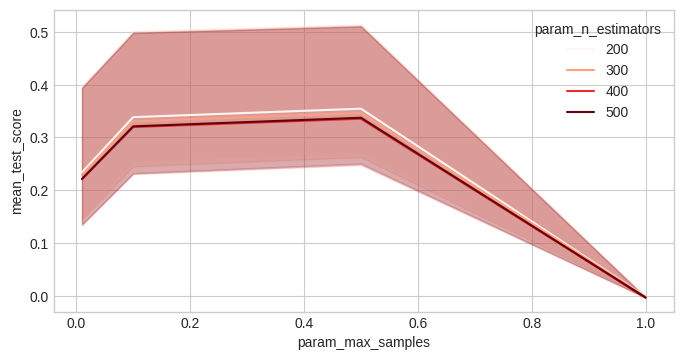

In [263]:
fig = plt.figure(figsize=(8,4),dpi=100)
sns.lineplot(x=output_results_ridge1['param_max_samples'],y=output_results_ridge1['mean_test_score'],hue=output_results_ridge1['param_n_estimators'],
            palette='Reds')

### Applying best parameters

In [264]:
past_reg_ridge1 = BaggingRegressor(Ridge(random_state=0,alpha=1.0), bootstrap= False, max_features= 0.5, max_samples= 0.5, n_estimators= 500, n_jobs = jobs)
past_reg_ridge1.fit(X_train_scale, Y_train)

print('Train score: %.2f'%past_reg_ridge1.score(X_train_scale, Y_train))
print('Test score: %.2f'%past_reg_ridge1.score(X_test_scale, Y_test))

Train score: 0.60
Test score: 0.59


In [265]:
#Cross validation train and test scores
ridge_past_scores_train= cross_val_score(past_reg_ridge1,X_train_scale,Y_train,cv=kfold,scoring='r2', n_jobs = jobs)
print('Average Train Score of ridge model with pasting from Cross Validation: {0:.4f}'.format(ridge_past_scores_train.mean()))
ridge_past_scores_test = cross_val_score(past_reg_ridge1,X_test_scale,Y_test,cv=kfold,scoring='r2', n_jobs = jobs)
print('Average Test Score of ridge model with pasting from Cross Validation:  {0:.4f}'.format(ridge_past_scores_test.mean()))

Average Train Score of ridge model with pasting from Cross Validation: 0.5994
Average Test Score of ridge model with pasting from Cross Validation:  0.5839


In [266]:
print('The Best R Squared Value that we are getting is {}'.format(round(ridge_past_scores_train.mean(),4)))

The Best R Squared Value that we are getting is 0.5994


## Applying AdaBoost

Models on which Adaboost would be applied -
1. Lasso
2. Linear Regression

### 1. Lasso

In [267]:
grid_params_ada1 = {'n_estimators':[100, 500, 1000],
                    'learning_rate':[0.1, 0.5, 1]}

ada_grid = GridSearchCV(AdaBoostRegressor(Lasso(alpha=10,random_state=0), random_state=0), grid_params_ada1, cv = kfold, n_jobs = jobs)
ada_grid.fit(X_train_scale, Y_train)

# Print the score results and parameters for the best model
print("Best Score: {0:.4f}".format(ada_grid.best_score_))
print("Parameters selected:", ada_grid.best_estimator_)
print("Best Parameters selected:", ada_grid.best_params_)

Best Score: 0.3449
Parameters selected: AdaBoostRegressor(base_estimator=Lasso(alpha=10, random_state=0),
                  learning_rate=0.1, n_estimators=100, random_state=0)
Best Parameters selected: {'learning_rate': 0.1, 'n_estimators': 100}


From the above analysis, we see that for learning_rate=0.1, n_estimators=100 we get the best Lasso model with Adaboost. The best score is 0.3449.

In [268]:
output_results_lasso = pd.DataFrame(ada_grid.cv_results_)
output_results_lasso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.974819,0.212252,0.018762,0.002972,0.1,100,"{'learning_rate': 0.1, 'n_estimators': 100}",0.426567,0.260669,0.448751,0.344844,0.243895,0.344945,0.083368,1
1,1.282916,0.584106,0.020964,0.003315,0.1,500,"{'learning_rate': 0.1, 'n_estimators': 500}",0.412946,0.261300,0.448000,0.344866,0.232328,0.339888,0.083421,2
2,1.110112,0.353209,0.022098,0.006931,0.1,1000,"{'learning_rate': 0.1, 'n_estimators': 1000}",0.412946,0.261300,0.448000,0.344866,0.232328,0.339888,0.083421,2
3,0.303847,0.166071,0.004927,0.001122,0.5,100,"{'learning_rate': 0.5, 'n_estimators': 100}",0.409913,0.264313,0.428332,0.329019,0.220405,0.330396,0.080475,4
4,0.257543,0.096544,0.005594,0.001164,0.5,500,"{'learning_rate': 0.5, 'n_estimators': 500}",0.409913,0.264313,0.428332,0.329019,0.220405,0.330396,0.080475,4


<AxesSubplot:xlabel='param_learning_rate', ylabel='mean_test_score'>

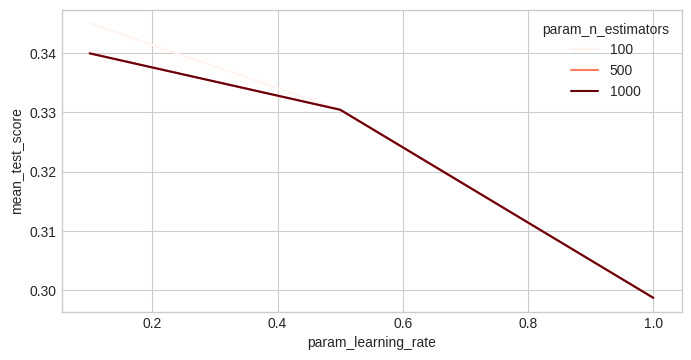

In [269]:
fig = plt.figure(figsize=(8,4),dpi=100)
sns.lineplot(x=output_results_lasso['param_learning_rate'],y=output_results_lasso['mean_test_score'],hue=output_results_lasso['param_n_estimators'],
            palette='Reds')

### Applying best parameters

In [270]:
ada_lasso = AdaBoostRegressor(Lasso(alpha=10,random_state=0),n_estimators= 100,
                              learning_rate= 0.1)
ada_lasso.fit(X_train_scale, Y_train)

print('Train score: %.2f'%ada_lasso.score(X_train_scale, Y_train))
print('Test score: %.2f'%ada_lasso.score(X_test_scale, Y_test))

Train score: 0.40
Test score: 0.40


In [271]:
#Cross validation train and test scores
ada_lasso_scores_train= cross_val_score(ada_lasso,X_train_scale,Y_train,cv=kfold,scoring='r2', n_jobs = jobs)
print('Average Train Score of lasso model with adaboost from Cross Validation: {0:.4f}'.format(ada_lasso_scores_train.mean()))
ada_lasso_scores_test = cross_val_score(ada_lasso,X_test_scale,Y_test,cv=kfold,scoring='r2', n_jobs = jobs)
print('Average Test Score of lasso model with adaboost from Cross Validation:  {0:.4f}'.format(ada_lasso_scores_test.mean()))

Average Train Score of lasso model with adaboost from Cross Validation: 0.3539
Average Test Score of lasso model with adaboost from Cross Validation:  0.3201


In [272]:
print('The Best R Squared Value that we are getting is {}'.format(round(ada_lasso_scores_train.mean(),4)))

The Best R Squared Value that we are getting is 0.3539


### 2. Linear Regression

In [273]:
grid_params_ada2 = {'n_estimators':[100, 500, 1000],
                    'learning_rate':[0.1, 0.5, 1]}

ada_grid1 = GridSearchCV(AdaBoostRegressor(LinearRegression(), random_state=0), grid_params_ada2, cv = kfold, n_jobs = jobs)
ada_grid1.fit(X_train_scale, Y_train)

# Print the score results and parameters for the best model
print("Best Score: {0:.4f}".format(ada_grid1.best_score_))
print("Parameters selected:", ada_grid1.best_estimator_)
print("Best Parameters selected:", ada_grid1.best_params_)

Best Score: 0.3554
Parameters selected: AdaBoostRegressor(base_estimator=LinearRegression(), learning_rate=0.1,
                  n_estimators=100, random_state=0)
Best Parameters selected: {'learning_rate': 0.1, 'n_estimators': 100}


From the above analysis, we see that for 'learning_rate': 0.1,'n_estimators': 100 we get the best Linear Regression model with Adaboost. The best score is 0.3554.

In [274]:
output_results_linreg = pd.DataFrame(ada_grid1.cv_results_)
output_results_linreg.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.779627,0.091586,0.019307,0.001849,0.1,100,"{'learning_rate': 0.1, 'n_estimators': 100}",0.428175,0.285256,0.456911,0.354583,0.252295,0.355444,0.078933,1
1,0.875591,0.197544,0.025110,0.008777,0.1,500,"{'learning_rate': 0.1, 'n_estimators': 500}",0.404897,0.272335,0.444036,0.353392,0.252789,0.345490,0.073822,2
2,0.888519,0.126380,0.021882,0.002169,0.1,1000,"{'learning_rate': 0.1, 'n_estimators': 1000}",0.404897,0.272335,0.444036,0.353392,0.252789,0.345490,0.073822,2
3,0.215530,0.030304,0.006140,0.000862,0.5,100,"{'learning_rate': 0.5, 'n_estimators': 100}",0.418035,0.275974,0.429529,0.302724,0.197737,0.324800,0.087952,4
4,0.221160,0.027853,0.005682,0.001034,0.5,500,"{'learning_rate': 0.5, 'n_estimators': 500}",0.418035,0.275974,0.429529,0.302724,0.197737,0.324800,0.087952,4


<AxesSubplot:xlabel='param_learning_rate', ylabel='mean_test_score'>

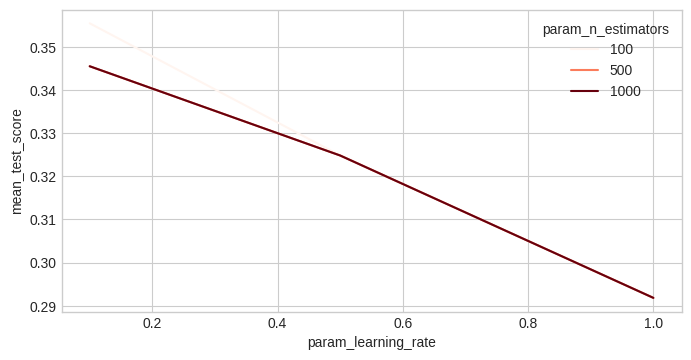

In [275]:
fig = plt.figure(figsize=(8,4),dpi=100)
sns.lineplot(x=output_results_linreg['param_learning_rate'],y=output_results_linreg['mean_test_score'],hue=output_results_linreg['param_n_estimators'],
            palette='Reds')

### Applying best parameters

In [276]:
ada_linreg = AdaBoostRegressor(LinearRegression(),n_estimators= 100,
                              learning_rate= 0.1)
ada_linreg.fit(X_train_scale, Y_train)

print('Train score: %.2f'%ada_linreg.score(X_train_scale, Y_train))
print('Test score: %.2f'%ada_linreg.score(X_test_scale, Y_test))

Train score: 0.38
Test score: 0.38


In [277]:
#Cross validation train and test scores
ada_linreg_scores_train= cross_val_score(ada_linreg,X_train_scale,Y_train,cv=kfold,scoring='r2', n_jobs = jobs)
print('Average Train Score of linear regression model with adaboost from Cross Validation: {0:.4f}'.format(ada_linreg_scores_train.mean()))
ada_linreg_scores_test = cross_val_score(ada_lasso,X_test_scale,Y_test,cv=kfold,scoring='r2', n_jobs = jobs)
print('Average Test Score of linear regression model with adaboost from Cross Validation:  {0:.4f}'.format(ada_linreg_scores_test.mean()))

Average Train Score of linear regression model with adaboost from Cross Validation: 0.3547
Average Test Score of linear regression model with adaboost from Cross Validation:  0.3179


In [278]:
print('The Best R Squared Value that we are getting is {}'.format(round(ada_linreg_scores_train.mean(),4)))

The Best R Squared Value that we are getting is 0.3547


## Applying Gradient Boosting

In [279]:
grid_params_gradient = {'max_depth':[1,2,3],
                        'n_estimators':[100, 500, 1000],
                        'learning_rate':[0.1, 0.5, 1]}

grad_grid = GridSearchCV(GradientBoostingRegressor(random_state=0), grid_params_gradient, cv = kfold, n_jobs = jobs)
grad_grid.fit(X_train_scale, Y_train)

# Print the score results and parameters for the best model
print("Best Score: {0:.4f}".format(grad_grid.best_score_))
print("Parameters selected:", grad_grid.best_estimator_)
print("Best Parameters selected:", grad_grid.best_params_)

Best Score: 0.8251
Parameters selected: GradientBoostingRegressor(n_estimators=1000, random_state=0)
Best Parameters selected: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000}


In [280]:
output_results_grad = pd.DataFrame(grad_grid.cv_results_)
output_results_grad.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.650598,0.025844,0.002563,0.000395,0.1,1,100,"{'learning_rate': 0.1, 'max_depth': 1, 'n_esti...",0.666928,0.654420,0.709483,0.735762,0.664043,0.686127,0.031211,27
1,3.121758,0.168508,0.006868,0.000926,0.1,1,500,"{'learning_rate': 0.1, 'max_depth': 1, 'n_esti...",0.725230,0.693626,0.771972,0.755447,0.722552,0.733766,0.027348,17
2,6.290762,0.332795,0.012133,0.001675,0.1,1,1000,"{'learning_rate': 0.1, 'max_depth': 1, 'n_esti...",0.727273,0.693780,0.776879,0.746562,0.721228,0.733144,0.027636,18
3,1.258950,0.052164,0.003660,0.000347,0.1,2,100,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.763520,0.720254,0.760916,0.777542,0.753458,0.755138,0.019107,14
4,6.073661,0.271024,0.009891,0.001346,0.1,2,500,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.807625,0.729815,0.804790,0.802325,0.800097,0.788930,0.029664,8


Text(75.58333333333333, 0.5, 'Learning Rate')

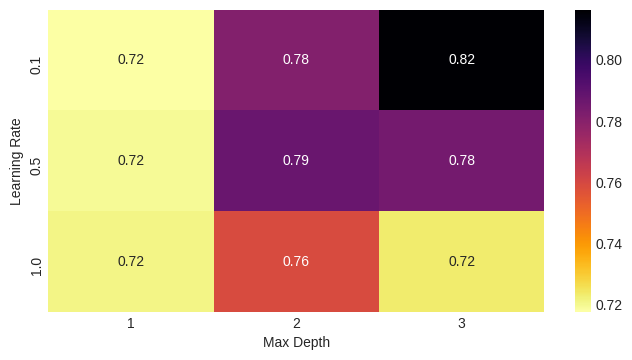

In [281]:
fig = plt.figure(figsize=(8,4),dpi=100)
sns.heatmap(output_results_grad.pivot_table(index='param_learning_rate',columns='param_max_depth',values='mean_test_score'),annot=True,cmap='inferno_r')
plt.xlabel('Max Depth')
plt.ylabel('Learning Rate')

From the above analysis we see that we get the best gradientboosting regressor with Max Depth: 3 and Learning Rate: 0.1

### Applying best parameters

In [282]:
grad_reg = GradientBoostingRegressor(random_state = 0,
                           n_estimators= 1000,
                           learning_rate= 0.1, max_depth=3)
grad_reg.fit(X_train_scale, Y_train)

print('Train score: %.2f'%grad_reg.score(X_train_scale, Y_train))
print('Test score: %.2f'%grad_reg.score(X_test_scale, Y_test))

Train score: 0.93
Test score: 0.85


In [283]:
#Cross validation train and test scores
grad_reg_scores_train= cross_val_score(grad_reg,X_train_scale,Y_train,cv=kfold,scoring='r2', n_jobs = jobs)
print('Average Train Score of linear regression model with adaboost from Cross Validation: {0:.4f}'.format(grad_reg_scores_train.mean()))
grad_reg_scores_test = cross_val_score(grad_reg,X_test_scale,Y_test,cv=kfold,scoring='r2', n_jobs = jobs)
print('Average Test Score of linear regression model with adaboost from Cross Validation:  {0:.4f}'.format(grad_reg_scores_test.mean()))

Average Train Score of linear regression model with adaboost from Cross Validation: 0.8251
Average Test Score of linear regression model with adaboost from Cross Validation:  0.8050


In [284]:
print('The Best R Squared Value that we are getting is {}'.format(round(grad_reg_scores_train.mean(),4)))

The Best R Squared Value that we are getting is 0.8251


# PCA

## Implementing Principal COmponenet Analysis

Using PCA we can cut down the features to lesser than half and also keep almost 90% of the variance in the dataset

In [285]:
pca = PCA(n_components=0.90,random_state=0)
X_train_reduced = pca.fit_transform(X_train_scale)
X_test_reduced = pca.transform(X_test_scale)

In [286]:
X_test_reduced.shape

(4861, 7)

We will run all the previous models in project part 1 on the reduced dataset

## Applying models with PCA

### 1. K Nearest Neighbor Model with PCA

In [287]:
num = list(range(1,20))
knn = KNeighborsRegressor(n_jobs = jobs)

grid_params_pca_1  = {'n_neighbors':num}
kfold = KFold(n_splits=5)
grid_knn_pca = GridSearchCV(knn,grid_params_pca_1,cv=kfold,verbose=3, n_jobs = jobs)

grid_knn_pca.fit(X_train_reduced,Y_train)

# Print the score results and parameters for the best model
print("Best Score: {0:.4f}".format(grid_knn_pca.best_score_))
print("Parameters selected:", grid_knn_pca.best_estimator_)
print("Best Parameters selected:", grid_knn_pca.best_params_)

Fitting 5 folds for each of 19 candidates, totalling 95 fits
Best Score: 0.7260
Parameters selected: KNeighborsRegressor(n_jobs=10, n_neighbors=9)
Best Parameters selected: {'n_neighbors': 9}


From above we see that the best score is 0.7260 when KNN model is applied on the reduced dataset. The best parameters are 'n_neighbors': 9.

In [288]:
output_results_knn_pca = pd.DataFrame(grid_knn_pca.cv_results_)
output_results_knn_pca.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010350,0.000136,0.035032,0.005634,1,{'n_neighbors': 1},0.586878,0.318407,0.599388,0.510050,0.591142,0.521173,0.106366,19
1,0.010300,0.000232,0.035828,0.008553,2,{'n_neighbors': 2},0.689842,0.568961,0.652436,0.604434,0.679208,0.638976,0.045788,18
2,0.011746,0.003460,0.030850,0.006722,3,{'n_neighbors': 3},0.723219,0.631280,0.676708,0.664540,0.713441,0.681838,0.033445,17
3,0.013002,0.004134,0.046739,0.017427,4,{'n_neighbors': 4},0.741763,0.667996,0.696897,0.695839,0.722059,0.704911,0.025145,16
4,0.010968,0.000847,0.053610,0.015062,5,{'n_neighbors': 5},0.746317,0.686126,0.695338,0.718133,0.724918,0.714166,0.021475,12


Text(0.5, 1.0, 'Testing Accuracy For Different values of K(Neighbours)')

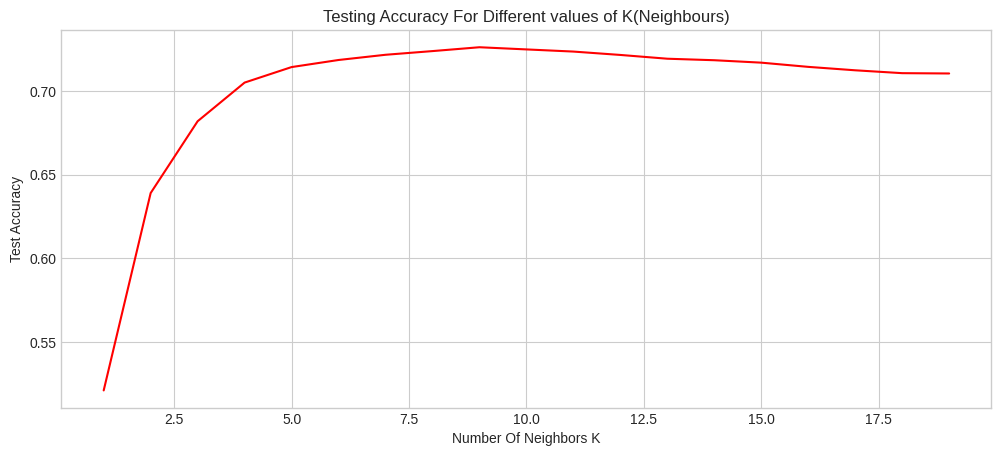

In [289]:
fig = plt.figure(figsize=(12,5),dpi=100)
sns.lineplot(data=output_results_knn_pca,x=output_results_knn_pca['param_n_neighbors'],y=output_results_knn_pca['mean_test_score'],color='red')
plt.xlabel('Number Of Neighbors K')
plt.ylabel('Test Accuracy')
plt.title('Testing Accuracy For Different values of K(Neighbours)')

### Applying best parameters

In [290]:
knn1 = KNeighborsRegressor(n_neighbors=9, n_jobs = jobs)

In [291]:
#Cross validation train and test scores
knn_crossval_scores_train= cross_val_score(knn1,X_train_reduced,Y_train,cv=kfold,scoring='r2', n_jobs = jobs)
print('Average Train Score of KNN model on reduced dataset from Cross Validation: {0:.4f}'.format(knn_crossval_scores_train.mean()))
knn_crossval_scores_test = cross_val_score(knn1,X_test_reduced,Y_test,cv=kfold,scoring='r2', n_jobs = jobs)
print('Average Test Score of KNN model on reduced dataset from Cross Validation:  {0:.4f}'.format(knn_crossval_scores_test.mean()))

Average Train Score of KNN model on reduced dataset from Cross Validation: 0.7260
Average Test Score of KNN model on reduced dataset from Cross Validation:  0.6550


In [292]:
print('The cross validated R-Squared score of the best knn model with 9 neighbours on the reduced dataset by pca is: {}'.format(round(knn_crossval_scores_train.mean(),4)))

The cross validated R-Squared score of the best knn model with 9 neighbours on the reduced dataset by pca is: 0.726


## 2. Linear Regression with PCA

In [293]:
# Fit the linear regression model 
linear_reg = LinearRegression(n_jobs = jobs)
linear_reg.fit(X_train_reduced, Y_train)

LinearRegression(n_jobs=10)

In [294]:
# train and test scores for linear regression
print("Train and Test scores for linear regression model:")
print("Train Score: {0:.4f}".format(linear_reg.score(X_train_reduced, Y_train)))
print("Test Score: {0:.4f}".format(linear_reg.score(X_test_reduced, Y_test)))

#Cross validation train and test scores
linearreg_crossval_scores_train = cross_val_score(linear_reg,X_train_reduced,Y_train,cv=kfold,scoring='r2', n_jobs = jobs)
print('Average Train Score for Linear Regression model on reduced dataset from Cross Validation: {0:.4f}'.format(linearreg_crossval_scores_train.mean()))
linearreg_crossval_scores_test = cross_val_score(linear_reg,X_test_reduced,Y_test,cv=kfold,scoring='r2', n_jobs = jobs)
print('Average Test Score for Linear Regression model on reduced dataset from Cross Validation: {0:.4f}'.format(linearreg_crossval_scores_test.mean()))

Train and Test scores for linear regression model:
Train Score: 0.6078
Test Score: 0.5871
Average Train Score for Linear Regression model on reduced dataset from Cross Validation: 0.6075
Average Test Score for Linear Regression model on reduced dataset from Cross Validation: 0.5841


In [295]:
lm_mean_score_cv_pca= linearreg_crossval_scores_train.mean()

Text(0.5, 1.0, 'Testing Accuracy For different Cross Validation Iteration')

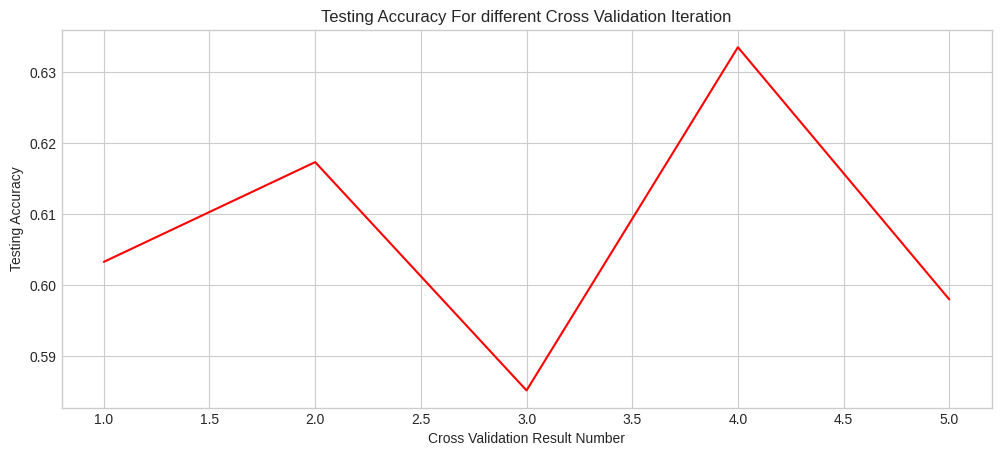

In [296]:
fig = plt.figure(figsize=(12,5),dpi=100)
plt.plot(np.arange(1,6),linearreg_crossval_scores_train,c='red')
plt.xlabel('Cross Validation Result Number')
plt.ylabel('Testing Accuracy')
plt.title('Testing Accuracy For different Cross Validation Iteration')



In [297]:
print('The cross validated Test score(R-Squared) of the best Linear Regression model with reduced dataset is: {}'.format(round(linearreg_crossval_scores_train.mean(),4)))

The cross validated Test score(R-Squared) of the best Linear Regression model with reduced dataset is: 0.6075


## 3. Ridge with PCA

In [298]:
# Grid search & Graphical representation of alpha paramter and train-test scores
# Create hyperparameter tuning values
grid_params_pca_2 = {'alpha' : [0.01, 0.1, 1, 10, 100]}

# create and fit a ridge regression model, testing each alpha
ridge_model = Ridge(random_state=0)
ridge_model.fit(X_train_reduced,Y_train)

# train and test scores for ridge model
print("Train and Test scores for Ridge model on reduced dataset:")
print("Train Score: {0:.4f}".format(ridge_model.score(X_train_reduced, Y_train)))
print("Test Score: {0:.4f}".format(ridge_model.score(X_test_reduced, Y_test)))


# Fit the model for grid search
grid_ridge_pca = GridSearchCV(ridge_model, grid_params_pca_2,scoring ="r2",cv=kfold,return_train_score=True, n_jobs = jobs)
grid_ridge_pca.fit(X_train_reduced,Y_train)


# Print the score results and parameters for the best model
print("The best score of Grid search for Ridge on reduced dataset is {0:.4f}".format(grid_ridge_pca.best_score_))
print("The best estimator of Grid search for Ridge on reduced dataset is ",grid_ridge_pca.best_estimator_)

Train and Test scores for Ridge model on reduced dataset:
Train Score: 0.6078
Test Score: 0.5871
The best score of Grid search for Ridge on reduced dataset is 0.6075
The best estimator of Grid search for Ridge on reduced dataset is  Ridge(alpha=1, random_state=0)


<AxesSubplot:xlabel='param_alpha', ylabel='mean_test_score'>

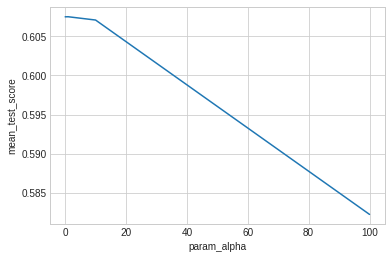

In [299]:
# Plotting the avg test score v/s hyperparameter C
sns.lineplot(x='param_alpha', y='mean_test_score', data=pd.DataFrame(grid_ridge_pca.cv_results_))

Text(0.5, 1.0, 'Testing Accuracy by Range of Alpha(Tuning Parameter) values Ridge Regression')

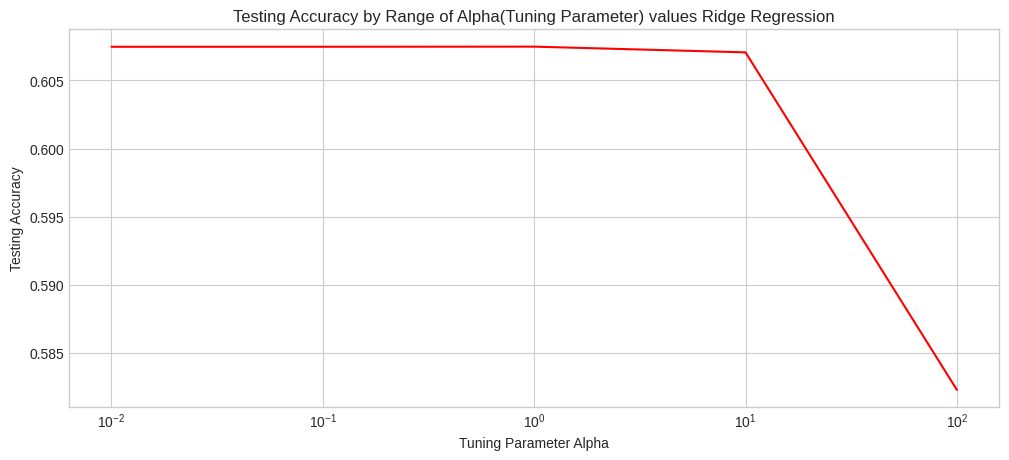

In [300]:
fig = plt.figure(figsize=(12,5),dpi=100)
sns.lineplot(data=grid_ridge_pca.cv_results_,x='param_alpha',y='mean_test_score',color = 'red')
plt.xlabel('Tuning Parameter Alpha')
plt.ylabel('Testing Accuracy')
plt.xscale('log')
plt.title('Testing Accuracy by Range of Alpha(Tuning Parameter) values Ridge Regression')



### Applying best parameters

In [301]:
ridge = Ridge(alpha=1,random_state=0)

In [302]:
#Cross validation train and test scores
ridge_crossval_scores_train= cross_val_score(ridge,X_train_reduced,Y_train,cv=kfold,scoring='r2', n_jobs = jobs)
print('Average Train Score of ridge model on reduced dataset from Cross Validation: {0:.4f}'.format(ridge_crossval_scores_train.mean()))
ridge_crossval_scores_test = cross_val_score(ridge,X_test_reduced,Y_test,cv=kfold,scoring='r2', n_jobs = jobs)
print('Average Test Score of ridge model on reduced dataset from Cross Validation:  {0:.4f}'.format(ridge_crossval_scores_test.mean()))

Average Train Score of ridge model on reduced dataset from Cross Validation: 0.6075
Average Test Score of ridge model on reduced dataset from Cross Validation:  0.5844


In [303]:
print('The cross validated Testing score (R-Squared) of the best Ridge model with reduced dataset is: {}'.format(round(ridge_crossval_scores_train.mean(),4)))

The cross validated Testing score (R-Squared) of the best Ridge model with reduced dataset is: 0.6075


## 4. Lasso with PCA

In [304]:
# Grid search & Graphical representation of alpha paramter and train-test scores

grid_params_pca_3 = {'alpha' : [0.01, 0.1, 1, 10, 100]}

# create and fit a lasso regression model, testing each alpha
lasso_model = Lasso()
lasso_model.fit(X_train_reduced,Y_train)

# train and test scores for lasso model
print("Train and Test scores for Lasso model on reduced dataset:")
print("Train Score: {0:.4f}".format(lasso_model.score(X_train_reduced, Y_train)))
print("Test Score: {0:.4f}".format(lasso_model.score(X_test_reduced, Y_test)))

grid_lasso_pca = GridSearchCV(lasso_model, grid_params_pca_3, scoring ="r2", return_train_score=True, cv=kfold, n_jobs = jobs)
grid_lasso_pca.fit(X_train_reduced,Y_train)

#print the best score and parameters for best model
print("The best score of Grid search for Lasso on reduced dataset is {0:.4f}".format(grid_lasso_pca.best_score_))
print("The best estimator of Grid search for Lasso on reduced dataset is ",grid_lasso_pca.best_estimator_)

Train and Test scores for Lasso model on reduced dataset:
Train Score: 0.6078
Test Score: 0.5871
The best score of Grid search for Lasso on reduced dataset is 0.6075
The best estimator of Grid search for Lasso on reduced dataset is  Lasso(alpha=10)


<AxesSubplot:xlabel='param_alpha', ylabel='mean_test_score'>

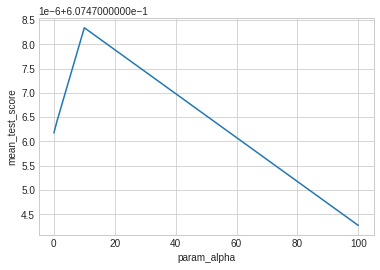

In [305]:
sns.lineplot(x='param_alpha', y='mean_test_score', data=pd.DataFrame(grid_lasso_pca.cv_results_))

In [306]:
output_results_lasso_pca = pd.DataFrame(grid_lasso_pca.cv_results_)
output_results_lasso_pca.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001579,0.000029,0.000335,0.000012,0.01,{'alpha': 0.01},0.603296,0.617355,0.585179,0.633542,0.598009,0.607476,0.016621,4,0.608813,0.605348,0.614015,0.601740,0.609957,0.607975,0.004168
1,0.001668,0.000219,0.000355,0.000050,0.1,{'alpha': 0.1},0.603296,0.617355,0.585178,0.633543,0.598009,0.607476,0.016621,3,0.608813,0.605348,0.614015,0.601740,0.609957,0.607975,0.004168
2,0.001623,0.000183,0.000357,0.000034,1,{'alpha': 1},0.603293,0.617358,0.585175,0.633545,0.598012,0.607476,0.016623,2,0.608813,0.605348,0.614015,0.601740,0.609957,0.607975,0.004168
3,0.001653,0.000215,0.000344,0.000037,10,{'alpha': 10},0.603264,0.617385,0.585146,0.633564,0.598033,0.607478,0.016639,1,0.608813,0.605348,0.614015,0.601740,0.609956,0.607974,0.004168
4,0.001874,0.000489,0.000326,0.000035,100,{'alpha': 100},0.602960,0.617626,0.584831,0.633732,0.598222,0.607474,0.016800,5,0.608787,0.605322,0.613988,0.601715,0.609931,0.607949,0.004168


Text(0.5, 1.0, 'Testing Accuracy by Range of Alpha(Tuning Parameter) values For Lasso Regression')

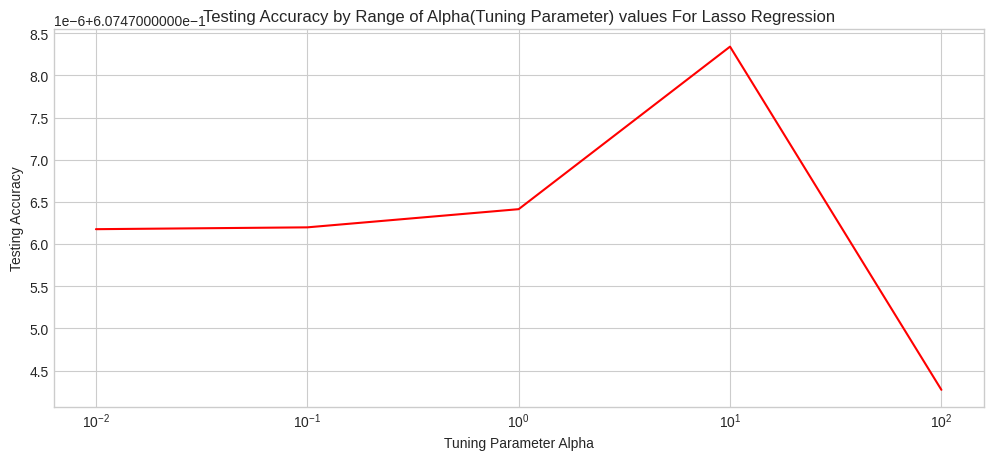

In [307]:
fig = plt.figure(figsize=(12,5),dpi=100)
sns.lineplot(data=output_results_lasso_pca,x='param_alpha',y='mean_test_score',color = 'red')
plt.xlabel('Tuning Parameter Alpha')
plt.ylabel('Testing Accuracy')
plt.xscale('log')
plt.title('Testing Accuracy by Range of Alpha(Tuning Parameter) values For Lasso Regression')



### Applying Best Parameters

In [308]:
lasso = Lasso(alpha=10,random_state=0)

In [309]:
#Cross validation train and test scores
lasso_crossval_scores_train= cross_val_score(lasso,X_train_reduced,Y_train,cv=kfold,scoring='r2', n_jobs = jobs)
print('Average Train Score of lasso model on reduced dataset from Cross Validation: {0:.4f}'.format(lasso_crossval_scores_train.mean()))
lasso_crossval_scores_test = cross_val_score(lasso,X_test_reduced,Y_test,cv=kfold,scoring='r2', n_jobs = jobs)
print('Average Test Score of lasso model on reduced dataset from Cross Validation:  {0:.4f}'.format(lasso_crossval_scores_test.mean()))

Average Train Score of lasso model on reduced dataset from Cross Validation: 0.6075
Average Test Score of lasso model on reduced dataset from Cross Validation:  0.5842


In [310]:
print('The cross validated Testing score(R-Squared) of the best Lasso model with reduced dataset is: {}'.format(round(lasso_crossval_scores_train.mean(),4)))

The cross validated Testing score(R-Squared) of the best Lasso model with reduced dataset is: 0.6075


## 5. Decision Tree with PCA

In [311]:
# create a regressor object 
grid_params_pca_4 = {"min_samples_split": [2, 10],
                     "max_depth": [2,5,10,25,50]}

# create and fit a decision tree regressor
dec_tree = DecisionTreeRegressor(random_state=0)
dec_tree.fit(X_train_reduced,Y_train)

# train and test scores for decision Tree Regressor model
print("Train and Test scores for Lasso model on reduced dataset:")
print("Train Score: {0:.4f}".format(dec_tree.score(X_train_reduced, Y_train)))
print("Test Score: {0:.4f}".format(dec_tree.score(X_test_reduced, Y_test)))

grid_dectree_pca = GridSearchCV(estimator=dec_tree, param_grid=grid_params_pca_4,scoring ="r2",verbose=5,return_train_score=True, n_jobs = jobs)
grid_dectree_pca.fit(X_train_reduced,Y_train)
print("The best score of Grid search for decision tree regressor on reduced dataset is {0:.4f}".format(grid_dectree_pca.best_score_))
print("The best estimator of Grid search for decision tree regressor on reduced dataset is ",grid_dectree_pca.best_estimator_)
print("The best parameters of Grid search for decision tree regressor on reduced dataset is ",grid_dectree_pca.best_params_)

Train and Test scores for Lasso model on reduced dataset:
Train Score: 0.9999
Test Score: 0.4527
Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best score of Grid search for decision tree regressor on reduced dataset is 0.5567
The best estimator of Grid search for decision tree regressor on reduced dataset is  DecisionTreeRegressor(max_depth=5, min_samples_split=10, random_state=0)
The best parameters of Grid search for decision tree regressor on reduced dataset is  {'max_depth': 5, 'min_samples_split': 10}


From above we see that the best score is 0.5567 when Decision Tree Regressor model is applied on the reduced dataset. The best parameters are max_depth=5, min_samples_split=10.

In [312]:
output_results_dectree_pca = pd.DataFrame(grid_dectree_pca.cv_results_)
output_results_dectree_pca

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.030668,0.006978,0.000815,0.000146,2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.319559,0.337814,0.346137,0.337993,0.346878,0.337676,0.009845,9,0.349415,0.344835,0.340972,0.344754,0.341641,0.344323,0.002993
1,0.027035,0.008644,0.000729,0.000200,2,10,"{'max_depth': 2, 'min_samples_split': 10}",0.319559,0.337814,0.346137,0.337993,0.346878,0.337676,0.009845,9,0.349415,0.344835,0.340972,0.344754,0.341641,0.344323,0.002993
2,0.047455,0.010187,0.000675,0.000157,5,2,"{'max_depth': 5, 'min_samples_split': 2}",0.557778,0.520154,0.562308,0.571544,0.569669,0.556290,0.018740,2,0.626016,0.628782,0.620625,0.612673,0.625669,0.622753,0.005686
3,0.044069,0.006684,0.000574,0.000016,5,10,"{'max_depth': 5, 'min_samples_split': 10}",0.557778,0.520154,0.562308,0.573348,0.569669,0.556651,0.019045,1,0.624187,0.628782,0.620625,0.610257,0.623902,0.621551,0.006216
4,0.065942,0.005220,0.000662,0.000070,10,2,"{'max_depth': 10, 'min_samples_split': 2}",0.543859,0.147033,0.647480,0.539948,0.613724,0.498409,0.180430,4,0.859166,0.875892,0.867881,0.865966,0.870271,0.867835,0.005468
5,0.065887,0.004372,0.000643,0.000051,10,10,"{'max_depth': 10, 'min_samples_split': 10}",0.603689,0.212474,0.626606,0.607327,0.628981,0.535815,0.161983,3,0.830229,0.857848,0.854889,0.817174,0.833859,0.838800,0.015410
6,0.091773,0.007951,0.000937,0.000116,25,2,"{'max_depth': 25, 'min_samples_split': 2}",0.470961,0.221143,0.539476,0.386455,0.502586,0.424124,0.113381,7,0.999792,0.999918,0.999695,0.999894,0.999804,0.999820,0.000080
7,0.081299,0.006426,0.000723,0.000008,25,10,"{'max_depth': 25, 'min_samples_split': 10}",0.571987,0.097947,0.576784,0.571350,0.597536,0.483121,0.192823,6,0.925239,0.936899,0.943112,0.904861,0.921325,0.926287,0.013270
8,0.095923,0.007279,0.000976,0.000070,50,2,"{'max_depth': 50, 'min_samples_split': 2}",0.499751,0.038807,0.537972,0.535267,0.490151,0.420390,0.191725,8,0.999950,0.999959,0.999946,0.999934,0.999954,0.999949,0.000009
9,0.077371,0.000579,0.000677,0.000009,50,10,"{'max_depth': 50, 'min_samples_split': 10}",0.567841,0.162488,0.575955,0.577738,0.600671,0.496939,0.167581,5,0.925280,0.936908,0.943196,0.904862,0.921372,0.926324,0.013288


Text(0.5, 1.0, 'Testing Accuracy by The Maximum Depth Of The Tree')

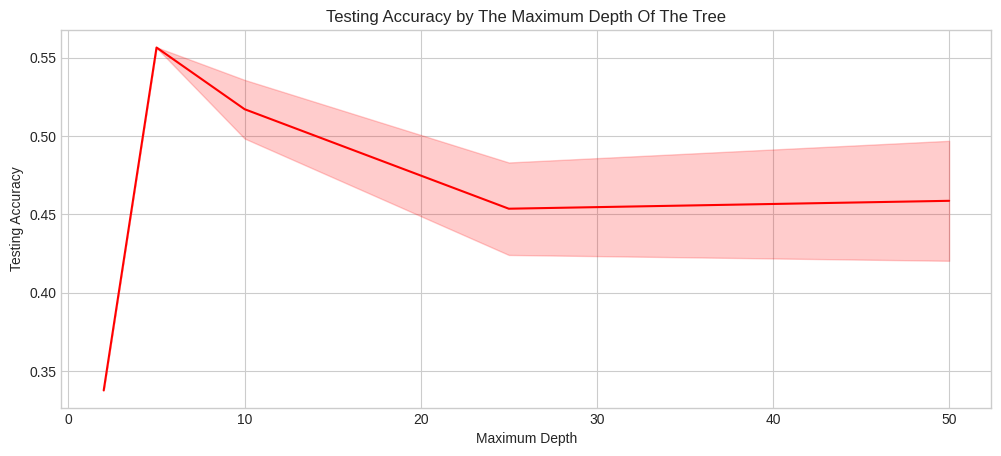

In [313]:
fig = plt.figure(figsize=(12,5),dpi=100)
sns.lineplot(data=output_results_dectree_pca,x='param_max_depth',y='mean_test_score',color='red')
plt.xlabel('Maximum Depth')
plt.ylabel('Testing Accuracy')
plt.title('Testing Accuracy by The Maximum Depth Of The Tree')

### Applying Best Parameters

In [314]:
dectree = DecisionTreeRegressor(max_depth=5, min_samples_split=10)
dectree.fit(X_train_reduced,Y_train)

DecisionTreeRegressor(max_depth=5, min_samples_split=10)

In [315]:
#Cross validation train and test scores
dectree_crossval_scores_train= cross_val_score(dectree,X_train_reduced,Y_train,cv=kfold,scoring='r2', n_jobs = jobs)
print('Average Train Score of decision tree regressor model on reduced dataset from Cross Validation: {0:.4f}'.format(dectree_crossval_scores_train.mean()))
dectree_crossval_scores_test = cross_val_score(dectree,X_test_reduced,Y_test,cv=kfold,scoring='r2', n_jobs = jobs)
print('Average Test Score of decision tree regressor model on reduced dataset from Cross Validation:  {0:.4f}'.format(dectree_crossval_scores_test.mean()))

Average Train Score of decision tree regressor model on reduced dataset from Cross Validation: 0.5567
Average Test Score of decision tree regressor model on reduced dataset from Cross Validation:  0.4211


In [316]:
print('The cross validated Test score (R-Squared) of the best Decision Tree Regressor model on reduced dataset is: {}'.format(round(dectree_crossval_scores_train.mean(),4)))

The cross validated Test score (R-Squared) of the best Decision Tree Regressor model on reduced dataset is: 0.5567


## 6. Linear SVM After PCA

In [317]:
# Grid search & Graphical representation of alpha paramter and train-test scores
#create hyperparameter for grid search, C
grid_params_pca_5 = {'C':[1,10,100,1000],
                     'epsilon':[0.01, 0.1, 0.5, 1]}

# create and fit a svr regression model, testing each C
linsvr_model = LinearSVR(random_state=0)
linsvr_model.fit(X_train_reduced,Y_train)

# train and test scores for decision Tree Regressor model
print("Train and Test scores for Linear SVM model on reduced dataset:")
print("Train Score: {0:.4f}".format(linsvr_model.score(X_train_reduced, Y_train)))
print("Test Score: {0:.4f}".format(linsvr_model.score(X_test_reduced, Y_test)))

grid_linsvr_pca = GridSearchCV(linsvr_model, grid_params_pca_5 ,scoring ="r2", return_train_score=True, refit=True, n_jobs = jobs)
grid_linsvr_pca.fit(X_train_reduced,Y_train)

print("The best score of Grid search for SVR on reduced dataset is {0:.4f}".format(grid_linsvr_pca.best_score_))
print("The best estimator of Grid search for Simple SVM on reduced dataset is ",grid_linsvr_pca.best_estimator_)

Train and Test scores for Linear SVM model on reduced dataset:
Train Score: -2.0370
Test Score: -2.0261
The best score of Grid search for SVR on reduced dataset is 0.4063
The best estimator of Grid search for Simple SVM on reduced dataset is  LinearSVR(C=1000, epsilon=0.01, random_state=0)


From above we see that the best score is 0.4063 when Linear SVM model is applied on the reduced dataset. The best parameters are C=1000 and epsilon=0.01.

<AxesSubplot:xlabel='param_C', ylabel='mean_test_score'>

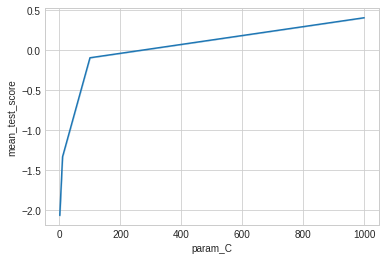

In [318]:
sns.lineplot(x='param_C', y='mean_test_score', data=pd.DataFrame(grid_linsvr_pca.cv_results_))

In [319]:
output_results_linsvm_pca = pd.DataFrame(grid_linsvr_pca.cv_results_)
output_results_linsvm_pca

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_epsilon,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002939,0.000668,0.000451,0.000133,1,0.01,"{'C': 1, 'epsilon': 0.01}",-1.955814,-2.201942,-1.885346,-2.137149,-2.164064,-2.068863,0.124816,13,-2.088729,-2.026512,-2.108150,-2.042108,-2.035142,-2.060128,0.032259
1,0.002795,0.000184,0.000412,0.000052,1,0.1,"{'C': 1, 'epsilon': 0.1}",-1.955814,-2.201942,-1.885346,-2.137149,-2.164064,-2.068863,0.124816,13,-2.088729,-2.026512,-2.108150,-2.042108,-2.035142,-2.060128,0.032259
2,0.002550,0.000245,0.000347,0.000016,1,0.5,"{'C': 1, 'epsilon': 0.5}",-1.955814,-2.201942,-1.885346,-2.137149,-2.164064,-2.068863,0.124816,13,-2.088729,-2.026512,-2.108150,-2.042108,-2.035142,-2.060128,0.032259
3,0.002866,0.000365,0.000475,0.000111,1,1,"{'C': 1, 'epsilon': 1}",-1.955814,-2.201942,-1.885346,-2.137149,-2.164064,-2.068863,0.124816,13,-2.088729,-2.026512,-2.108150,-2.042108,-2.035142,-2.060128,0.032259
4,0.002966,0.000622,0.000673,0.000110,10,0.01,"{'C': 10, 'epsilon': 0.01}",-1.271902,-1.423529,-1.216769,-1.369606,-1.394777,-1.335316,0.078189,9,-1.346076,-1.307333,-1.360955,-1.320945,-1.314032,-1.329868,0.020334
5,0.003274,0.000420,0.000657,0.000118,10,0.1,"{'C': 10, 'epsilon': 0.1}",-1.271902,-1.423529,-1.216769,-1.369606,-1.394777,-1.335316,0.078189,9,-1.346076,-1.307333,-1.360955,-1.320945,-1.314032,-1.329868,0.020334
6,0.003788,0.000582,0.000696,0.000083,10,0.5,"{'C': 10, 'epsilon': 0.5}",-1.271902,-1.423529,-1.216769,-1.369606,-1.394777,-1.335316,0.078189,9,-1.346076,-1.307333,-1.360955,-1.320945,-1.314032,-1.329868,0.020334
7,0.003699,0.000141,0.000744,0.000036,10,1,"{'C': 10, 'epsilon': 1}",-1.271902,-1.423529,-1.216769,-1.369606,-1.394777,-1.335316,0.078189,9,-1.346076,-1.307333,-1.360955,-1.320945,-1.314032,-1.329868,0.020334
8,0.003705,0.000348,0.000488,0.000047,100,0.01,"{'C': 100, 'epsilon': 0.01}",-0.102195,-0.106050,-0.085772,-0.082906,-0.096829,-0.094751,0.009037,5,-0.093104,-0.093155,-0.098535,-0.095748,-0.091751,-0.094459,0.002414
9,0.004190,0.000699,0.000571,0.000096,100,0.1,"{'C': 100, 'epsilon': 0.1}",-0.102196,-0.106050,-0.085772,-0.082906,-0.096829,-0.094751,0.009037,6,-0.093104,-0.093156,-0.098535,-0.095748,-0.091751,-0.094459,0.002414


Text(0.5, 1.0, 'HeatMap Of Mean Test Score With respect To C and epsilon parameters')

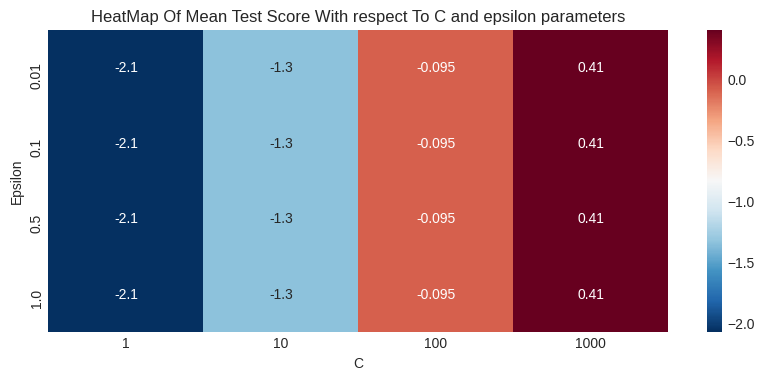

In [320]:
fig = plt.figure(figsize=(10,4),dpi=100)
sns.heatmap(output_results_linsvm_pca.pivot_table(index='param_epsilon',columns='param_C',values='mean_test_score'),annot=True,cmap='RdBu_r')
plt.ylabel('Epsilon')
plt.xlabel('C')
plt.title('HeatMap Of Mean Test Score With respect To C and epsilon parameters')



### Applying Best Parameters

In [321]:
linear_svm = LinearSVR(epsilon=0.01,C=1000)
linear_svm.fit(X_train_reduced,Y_train)

LinearSVR(C=1000, epsilon=0.01)

In [322]:
#Cross validation train and test scores
linearsvm_crossval_scores_train= cross_val_score(linear_svm,X_train_reduced,Y_train,cv=kfold,scoring='r2', n_jobs = jobs)
print('Average Train Score of Linear SVM model on reduced dataset from Cross Validation: {0:.4f}'.format(linearsvm_crossval_scores_train.mean()))
linearsvm_crossval_scores_test = cross_val_score(linear_svm,X_test_reduced,Y_test,cv=kfold,scoring='r2', n_jobs = jobs)
print('Average Test Score of Linear SVM model on reduced dataset from Cross Validation:  {0:.4f}'.format(linearsvm_crossval_scores_test.mean()))



Average Train Score of Linear SVM model on reduced dataset from Cross Validation: 0.4067
Average Test Score of Linear SVM model on reduced dataset from Cross Validation:  0.1999


In [323]:
print('The Final R2 Score That was Achived With Our Best Linear SVM Model with the value of C being 1000 and having epsilon as 0.01 on the reduced dataset  is: {} '.format(round(linearsvm_crossval_scores_train.mean(),4)))

The Final R2 Score That was Achived With Our Best Linear SVM Model with the value of C being 1000 and having epsilon as 0.01 on the reduced dataset  is: 0.4067 


## 7. Polynomial Regression With PCA

Best score for Polynomial features on reduced dataset: 0.7087
Best parameters for Polynomial Features on reduced dataset: {'Polynomial degree': 2}


Text(0.5, 0, 'Polynomial degree')

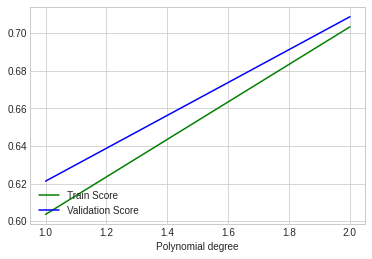

In [324]:
# Naive Grid search & Graphical representation of alpha paramter and train-test scores

x_train, x_valid, y_train, y_valid = train_test_split(X_train_reduced,Y_train,random_state=0)
x_train = pd.DataFrame(scaler.fit_transform(x_train))
x_valid = pd.DataFrame(scaler.transform(x_valid))

train_score_list = []
test_score_list = []
x_range = [1,2]

best_score=0
for num in range(1,3):
    poly = PolynomialFeatures(num)
    X_train_poly = poly.fit_transform(x_train)
    X_test_poly = poly.transform(x_valid)
    linear_reg.fit(X_train_poly, y_train)
    train_score_list.append(linear_reg.score(X_train_poly, y_train))
    score=linear_reg.score(X_test_poly, y_valid)
    test_score_list.append((score))
    if score > best_score:
        best_score = score
        best_parameters = {'Polynomial degree': num}

print("Best score for Polynomial features on reduced dataset: {0:.4f}".format(best_score))
print("Best parameters for Polynomial Features on reduced dataset: {}".format(best_parameters))

%matplotlib inline
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Validation Score')
plt.legend(loc = 3)
plt.xlabel('Polynomial degree')

Thus from the above analysis we get that for degree =2 we get the best polynomial regression model on reduced dataset with best score 0.7087

### Applying best parameters

In [325]:
# polynomial regression with cross validation
lin_reg1 = LinearRegression()
poly1 = PolynomialFeatures(degree=2)
x_train_poly1 = poly1.fit_transform(X_train_reduced)

poly_scores_train_pca = cross_val_score(lin_reg1,x_train_poly1,Y_train,cv=kfold,scoring='r2', n_jobs = jobs)
print('Average Train Score for polynomial regression on reduced dataset from Cross Validation: {0:.4f}'.format(poly_scores_train_pca.mean()))
x_test_poly1 = poly1.fit_transform(X_test_reduced)
poly_scores_test_pca = cross_val_score(lin_reg1,x_test_poly1,Y_test,cv=5,scoring='r2', n_jobs = jobs)
print('Average Test Score for polynomial regression on reduced dataset from Cross Validation: {0:.4f}'.format(poly_scores_test_pca.mean()))

Average Train Score for polynomial regression on reduced dataset from Cross Validation: 0.6978
Average Test Score for polynomial regression on reduced dataset from Cross Validation: 0.6767


In [326]:
print('The Final R2 Score That was Achived With Our Best polynomial regression with the value of degree = 2 on the reduced dataset  is: {} '.format(round(poly_scores_train_pca.mean(),4)))

The Final R2 Score That was Achived With Our Best polynomial regression with the value of degree = 2 on the reduced dataset  is: 0.6978 


## 8. SVM with Linear Kernel with PCA

In [327]:
# Grid search & Graphical representation of C and gamma paramter and train-test scores

grid_params_pca_6 = {'C' : [100, 500, 1000],
                     'gamma' : [100, 500, 1000]}
# create and fit a SVM with linear kernel regression model, testing each C and gamma
linkernel_svr_model = SVR(kernel='linear')
linkernel_svr_model.fit(X_train_reduced,Y_train)

# train and test scores for decision Tree Regressor model
print("Train and Test scores for SVR linear kernel model on reduced dataset:")
print("Train Score: {0:.4f}".format(linkernel_svr_model.score(X_train_reduced, Y_train)))
print("Test Score: {0:.4f}".format(linkernel_svr_model.score(X_test_reduced, Y_test)))

grid_linkernelsvr_pca = GridSearchCV(linkernel_svr_model, grid_params_pca_6,scoring ="r2", return_train_score=True, verbose=5, n_jobs = jobs)
grid_linkernelsvr_pca.fit(X_train_reduced,Y_train)

print("The best score of Grid search for Linear SVR on reduced dataset is {0:.4f}".format(grid_linkernelsvr_pca.best_score_))
print("The best estimator of Grid search for Linear SVR on reduced dataset is ",grid_linkernelsvr_pca.best_estimator_)

Train and Test scores for SVR linear kernel model on reduced dataset:
Train Score: -0.0604
Test Score: -0.0532
Fitting 5 folds for each of 9 candidates, totalling 45 fits
The best score of Grid search for Linear SVR on reduced dataset is 0.4212
The best estimator of Grid search for Linear SVR on reduced dataset is  SVR(C=1000, gamma=100, kernel='linear')


From above we see that the best score is 0.4212 when SVR model with Linear kernel is applied on the reduced dataset. The best parameters are C=1000 and gamma=100

In [328]:
output_results_linkernelsvm_pca = pd.DataFrame(grid_linkernelsvr_pca.cv_results_)
output_results_linkernelsvm_pca

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.490411,0.735420,0.688069,0.171507,100,100,"{'C': 100, 'gamma': 100}",0.049578,0.064946,0.060038,0.075455,0.064238,0.062851,0.008358,7,0.063563,0.062597,0.063920,0.061150,0.062081,0.062662,0.001002
1,4.578286,0.980366,0.700520,0.163320,100,500,"{'C': 100, 'gamma': 500}",0.049578,0.064946,0.060038,0.075455,0.064238,0.062851,0.008358,7,0.063563,0.062597,0.063920,0.061150,0.062081,0.062662,0.001002
2,3.663787,0.070293,0.555867,0.031624,100,1000,"{'C': 100, 'gamma': 1000}",0.049578,0.064946,0.060038,0.075455,0.064238,0.062851,0.008358,7,0.063563,0.062597,0.063920,0.061150,0.062081,0.062662,0.001002
3,5.214363,0.879731,0.835431,0.136556,500,100,"{'C': 500, 'gamma': 100}",0.297123,0.333655,0.297760,0.340108,0.319236,0.317576,0.017776,4,0.321565,0.311881,0.322471,0.313097,0.314325,0.316668,0.004445
4,3.523816,0.066899,0.548355,0.033684,500,500,"{'C': 500, 'gamma': 500}",0.297123,0.333655,0.297760,0.340108,0.319236,0.317576,0.017776,4,0.321565,0.311881,0.322471,0.313097,0.314325,0.316668,0.004445
5,3.825505,0.597667,0.553161,0.031247,500,1000,"{'C': 500, 'gamma': 1000}",0.297123,0.333655,0.297760,0.340108,0.319236,0.317576,0.017776,4,0.321565,0.311881,0.322471,0.313097,0.314325,0.316668,0.004445
6,4.464813,0.902361,0.740669,0.178858,1000,100,"{'C': 1000, 'gamma': 100}",0.398838,0.440513,0.394868,0.448687,0.422898,0.421161,0.021563,1,0.424443,0.412414,0.427083,0.416494,0.419926,0.420072,0.005286
7,3.579501,0.330530,0.623395,0.143466,1000,500,"{'C': 1000, 'gamma': 500}",0.398838,0.440513,0.394868,0.448687,0.422898,0.421161,0.021563,1,0.424443,0.412414,0.427083,0.416494,0.419926,0.420072,0.005286
8,3.826037,0.671747,0.546717,0.040083,1000,1000,"{'C': 1000, 'gamma': 1000}",0.398838,0.440513,0.394868,0.448687,0.422898,0.421161,0.021563,1,0.424443,0.412414,0.427083,0.416494,0.419926,0.420072,0.005286


<AxesSubplot:xlabel='param_C', ylabel='mean_test_score'>

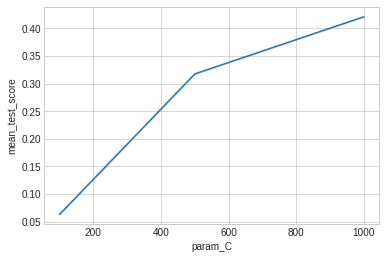

In [329]:
sns.lineplot(x='param_C', y='mean_test_score', data=output_results_linkernelsvm_pca)

Text(0.5, 1.0, 'HeatMap Of Mean Test Score With respect To C and epsilon parameters')

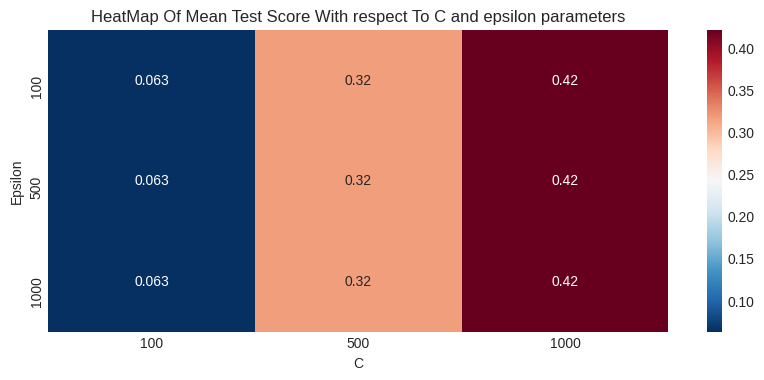

In [330]:
fig = plt.figure(figsize=(10,4),dpi=100)
sns.heatmap(output_results_linkernelsvm_pca.pivot_table(index='param_gamma',columns='param_C',values='mean_test_score'),annot=True,cmap='RdBu_r')
plt.ylabel('Epsilon')
plt.xlabel('C')
plt.title('HeatMap Of Mean Test Score With respect To C and epsilon parameters')


### Applying best parameters

In [331]:
# Fit the SVM Model with linear kernel
linkernel_svr_model = SVR(kernel="linear",C=1000,gamma = 100)
linkernel_svr_model.fit(X_train_reduced,Y_train)

SVR(C=1000, gamma=100, kernel='linear')

In [332]:
linkernelsvr_scores_train_pca = cross_val_score(linkernel_svr_model,X_train_reduced,Y_train,cv=kfold,scoring='r2', n_jobs = jobs)
print('Average Train Score for SVR model with linear kernel on reduced dataset from Cross Validation: {0:.4f}'.format(linkernelsvr_scores_train_pca.mean()))
linkernelsvr_scores_test_pca = cross_val_score(linkernel_svr_model,X_test_reduced,Y_test,cv=5,scoring='r2', n_jobs = jobs)
print('Average Test Score for SVR model with linear kernel on reduced dataset from Cross Validation: {0:.4f}'.format(linkernelsvr_scores_test_pca.mean()))

Average Train Score for SVR model with linear kernel on reduced dataset from Cross Validation: 0.4212
Average Test Score for SVR model with linear kernel on reduced dataset from Cross Validation: 0.2443


In [333]:
print('The Final R2 Score That was Achived With Our Best SVR model with linear kernel with the value of C=1000, gamma=100 on the reduced dataset  is: {} '.format(round(linkernelsvr_scores_train_pca.mean(),4)))

The Final R2 Score That was Achived With Our Best SVR model with linear kernel with the value of C=1000, gamma=100 on the reduced dataset  is: 0.4212 


## 9. SVM with RBF Kernel with PCA

In [334]:
# Grid search & Graphical representation of alpha paramter and train-test scores
grid_params_pca_6 = {'C' : [100, 500, 1000],
                     'gamma' : [100, 500, 1000]}
# create and fit a svr model with rbf kernel
rbfkernel_svr_model = SVR(kernel="rbf")
rbfkernel_svr_model.fit(X_train_reduced,Y_train)

# train and test scores for decision Tree Regressor model
print("Train and Test scores for SVR rbf kernel model on reduced dataset:")
print("Train Score: {0:.4f}".format(rbfkernel_svr_model.score(X_train_reduced, Y_train)))
print("Test Score: {0:.4f}".format(rbfkernel_svr_model.score(X_test_reduced, Y_test)))

grid_rbfkernelsvr_pca = GridSearchCV(estimator=rbfkernel_svr_model, param_grid=grid_params_pca_6,scoring ="r2",verbose=5, n_jobs = jobs)
grid_rbfkernelsvr_pca.fit(X_train_reduced,Y_train)
print("The best score of Grid search for rbf SVR on reduced dataset is {0:.4f}".format(grid_rbfkernelsvr_pca.best_score_))
print("The best estimator of Grid search for rbf SVR on reduced dataset is ",grid_rbfkernelsvr_pca.best_estimator_)

Train and Test scores for SVR rbf kernel model on reduced dataset:
Train Score: -0.0597
Test Score: -0.0526
Fitting 5 folds for each of 9 candidates, totalling 45 fits
The best score of Grid search for rbf SVR on reduced dataset is 0.0115
The best estimator of Grid search for rbf SVR on reduced dataset is  SVR(C=1000, gamma=100)


From above we see that the best score is 0.0115 when SVR model with rbf kernel is applied on the reduced dataset. The best parameters are C=1000 and gamma=100

<AxesSubplot:xlabel='param_C', ylabel='mean_test_score'>

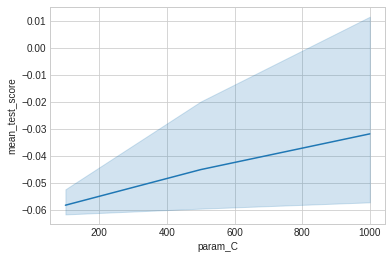

In [335]:
sns.lineplot(x='param_C', y='mean_test_score', data=pd.DataFrame(grid_rbfkernelsvr_pca.cv_results_))

### Applying best parameters

In [336]:
# Fit the SVM Model with rbf kernel
rbfkernel_svr_model1 = SVR(kernel="rbf",C=1000,gamma = 100)
rbfkernel_svr_model1.fit(X_train_reduced,Y_train)

SVR(C=1000, gamma=100)

In [337]:
rbfkernelsvr_scores_train_pca = cross_val_score(rbfkernel_svr_model1,X_train_reduced,Y_train,cv=kfold,scoring='r2', n_jobs = jobs)
print('Average Train Score for SVR model with rbf kernel on reduced dataset from Cross Validation: {0:.4f}'.format(rbfkernelsvr_scores_train_pca.mean()))
rbfkernelsvr_scores_test_pca = cross_val_score(rbfkernel_svr_model1,X_test_reduced,Y_test,cv=kfold,scoring='r2', n_jobs = jobs)
print('Average Test Score for SVR model with rbf kernel on reduced dataset from Cross Validation: {0:.4f}'.format(rbfkernelsvr_scores_test_pca.mean()))

Average Train Score for SVR model with rbf kernel on reduced dataset from Cross Validation: 0.0115
Average Test Score for SVR model with rbf kernel on reduced dataset from Cross Validation: -0.0303


In [338]:
print('The Final R2 Score That was Achived With Our Best SVR model with rbf kernel with the value of C=1000, gamma=100 on the reduced dataset  is: {} '.format(round(rbfkernelsvr_scores_train_pca.mean(),4)))

The Final R2 Score That was Achived With Our Best SVR model with rbf kernel with the value of C=1000, gamma=100 on the reduced dataset  is: 0.0115 


## 10. SVM with Poly Kernel with PCA

In [339]:
# Grid search & Graphical representation of alpha paramter and train-test scores
grid_params_pca_7 = {'C' : [100, 500, 1000],
                     'degree' : [1,2,3]}
# create and fit a ridge regression model, testing each alpha
polykernel_svr_model = SVR(kernel="poly")
polykernel_svr_model.fit(X_train_reduced,Y_train)

# train and test scores for decision Tree Regressor model
print("Train and Test scores for SVR poly kernel model on reduced dataset:")
print("Train Score: {0:.4f}".format(polykernel_svr_model.score(X_train_reduced, Y_train)))
print("Test Score: {0:.4f}".format(polykernel_svr_model.score(X_test_reduced, Y_test)))

grid_polykernelsvr_pca = GridSearchCV(estimator=polykernel_svr_model, param_grid=grid_params_pca_7,scoring ="r2",verbose=5, n_jobs = jobs)
grid_polykernelsvr_pca.fit(X_train_reduced,Y_train)

print("The best score of Grid search for Poly SVR is {0:.4f}".format(grid_polykernelsvr_pca.best_score_))
print("The best estimator of Grid search for Poly SVR is ",grid_polykernelsvr_pca.best_estimator_)

Train and Test scores for SVR poly kernel model on reduced dataset:
Train Score: -0.0410
Test Score: -0.0342
Fitting 5 folds for each of 9 candidates, totalling 45 fits
The best score of Grid search for Poly SVR is 0.5410
The best estimator of Grid search for Poly SVR is  SVR(C=1000, kernel='poly')


From above we see that the best score is 0.5410 when SVR model with poly kernel is applied on the reduced dataset. The best parameters are C=1000

<AxesSubplot:xlabel='param_C', ylabel='mean_test_score'>

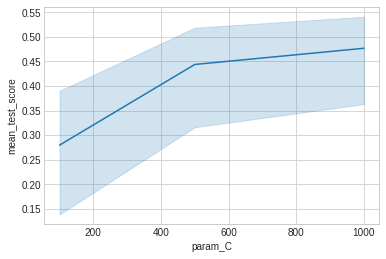

In [340]:
sns.lineplot(x='param_C', y='mean_test_score', data=pd.DataFrame(grid_polykernelsvr_pca.cv_results_))

### Applying best parameters

In [341]:
# Fit the SVM Model with poly kernel
polykernel_svr_model1 = SVR(kernel="poly",C=1000, degree=3)
polykernel_svr_model1.fit(X_train_reduced,Y_train)

SVR(C=1000, kernel='poly')

In [342]:
# poly kernel with cross validation
polykernelsvr_scores_train_pca = cross_val_score(polykernel_svr_model1,X_train_reduced,Y_train,cv=5,scoring='r2', n_jobs = jobs)
print('Average Train Score for SVR with poly kernel from Cross Validation on reduced dataset: {0:.4f}'.format(polykernelsvr_scores_train_pca.mean()))
polykernelsvr_scores_test_pca = cross_val_score(polykernel_svr_model1,X_test_reduced,Y_test,cv=5,scoring='r2', n_jobs = jobs)
print('Average Test Score for SVR with poly kernel from Cross Validation on reduced dataset: {0:.4f}'.format(polykernelsvr_scores_test_pca.mean()))

Average Train Score for SVR with poly kernel from Cross Validation on reduced dataset: 0.5410
Average Test Score for SVR with poly kernel from Cross Validation on reduced dataset: 0.4780


In [343]:
print('The Final R2 Score That was Achived With Our Best SVR model with poly kernel with the value of degree = 3 and C=1000 on the reduced dataset  is: {} '.format(round(polykernelsvr_scores_train_pca.mean(),4)))

The Final R2 Score That was Achived With Our Best SVR model with poly kernel with the value of degree = 3 and C=1000 on the reduced dataset  is: 0.541 


## Comparing Results of Models with PCA and Models without PCA

In [344]:
model_evaluation_PCA = {'Models with PCA':['KNN Regressor with PCA','Linear Regression with PCA', 'Ridge Regression', 'Lasso Regression', 'Polynomial Regression', 'Linear SVM with PCA',
                       'SVM Linear Kernel with PCA','SVM RBF Kernel with PCA','SVM Polynomial Kernel with PCA','Decision Tree Regressor with PCA'],
             'Best Test Scores':[knn_crossval_scores_train.mean(), linearreg_crossval_scores_train.mean(), ridge_crossval_scores_train.mean(), lasso_crossval_scores_train.mean(), poly_scores_train_pca.mean(),
                                 linearsvm_crossval_scores_train.mean(), linkernelsvr_scores_train_pca.mean(), rbfkernelsvr_scores_train_pca.mean(), polykernelsvr_scores_train_pca.mean(), dectree_crossval_scores_train.mean()]}

In [345]:
model_evaluation_pca = pd.DataFrame(model_evaluation_PCA)
model_evaluation_pca = model_evaluation_pca.sort_values(by='Best Test Scores',ascending = False)

## Results for Models with PCA

Text(0.5, 0, 'Test Scores(R2-score)')

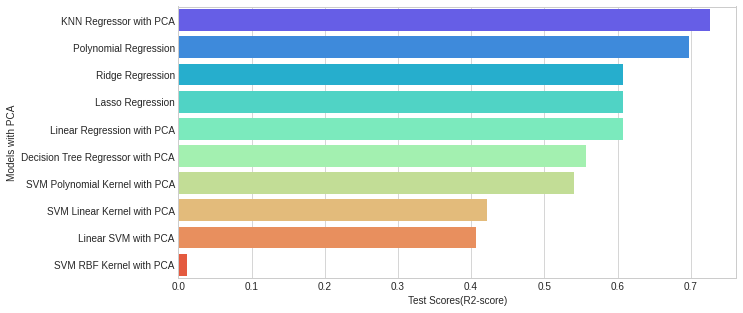

In [346]:
fig = plt.figure(figsize=(10,5))
sns.barplot(x=model_evaluation_pca['Best Test Scores'],y=model_evaluation_pca['Models with PCA'],orient='h',palette='rainbow')
plt.ylabel('Models with PCA')
plt.xlabel('Test Scores(R2-score)')

## Results for Models without PCA

In [347]:
model_evaluation_without_PCA = {'Models without PCA': ['KNN','Linear Regression','Ridge',
                                    'Lasso','Polynomial Regression','Simple SVR',
                                    'linear SVR','rbf SVR','poly SVR','Decision Tree Regressor'],
                    'Best Test Score' : [knn_scores_train.mean(), linreg_scores_train.mean(),ridge_scores_train.mean(),
                                lasso_scores_train.mean(),poly_scores_train.mean(),svr_scores_train.mean(),
                                lin_svr_scores_train.mean(),rbf_svr_scores_train.mean(),poly_svr_scores_train.mean(),
                                dec_tree_scores_test.mean()]}

In [348]:
model_eval_without_pca = pd.DataFrame(model_evaluation_without_PCA)
model_eval_without_pca = model_eval_without_pca.sort_values(by='Best Test Score',ascending = False)

Text(0.5, 0, 'Test Scores(f1-score)')

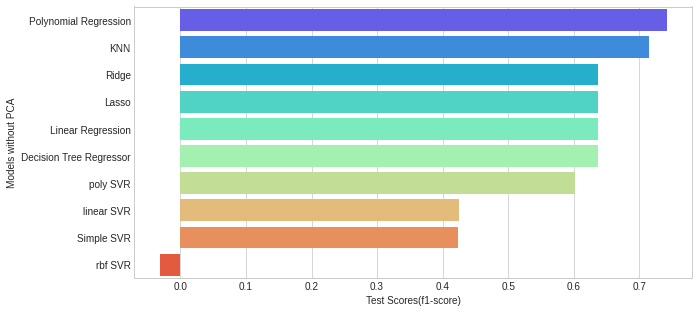

In [349]:
fig = plt.figure(figsize=(10,5))
sns.barplot(x=model_eval_without_pca['Best Test Score'],y=model_eval_without_pca['Models without PCA'],orient='h',palette='rainbow')
plt.ylabel('Models without PCA')
plt.xlabel('Test Scores(f1-score)')

### Comparing Results

<AxesSubplot:xlabel='Best Test Scores', ylabel='Models with PCA'>

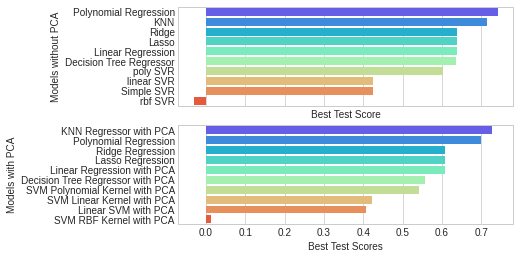

<Figure size 3600x3600 with 0 Axes>

In [350]:
fig, ax =plt.subplots(2,1,sharex=True)
plt.figure(figsize=(50,50))

sns.barplot(x=model_eval_without_pca['Best Test Score'],y=model_eval_without_pca['Models without PCA'],orient='h',palette='rainbow',ax=ax[0])

sns.barplot(x=model_evaluation_pca['Best Test Scores'],y=model_evaluation_pca['Models with PCA'],orient='h',palette='rainbow',ax=ax[1])

In the above analysis we compared models with PCA and models without PCA. When PCA is applied, 90% of the variation of the data is kept and we could reduce the attributes from 15 to 7. We can see that there is a significant loss of information and the R2 scores have decreased in models with PCA compared to the models without PCA. Thus we can conclude, applying PCA does not improve the performance of the models.

## Deep Learning Models

### Creating and compiling model

In [351]:
kfold = KFold(n_splits=5)

In [352]:
def create_model():    
    model = Sequential()
    model.add(Dense(15,input_dim=15, kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(3, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(optimizer = 'sgd',loss='mse',metrics=['mse'])
    return model

In [353]:
seed = 10
np.random.seed(10)

In [355]:
deep_learning_model = KerasRegressor(build_fn= create_model,verbose=5)

grid_params_deep = {'batch_size':[10,20,30,40],
                    'epochs':[10,25,50,100,250,500,1000]}
grid_deep_learning1 = GridSearchCV(estimator=deep_learning_model,param_grid=grid_params_deep,cv=kfold,verbose=3, n_jobs = jobs,scoring='r2')
grid_deep_learning1.fit(X_train_scale,Y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


/home/jack/PycharmProjects/DataScience_Project_Aditi/venv/lib/python3.9/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [        nan         nan         nan         nan -0.00079354         nan
         nan         nan         nan -0.00093691         nan         nan
         nan         nan -0.00046635         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan]
  warnings.warn(


Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7f5513667700>,
             n_jobs=10,
             param_grid={'batch_size': [10, 20, 30, 40],
                         'epochs': [10, 25, 50, 100, 250, 500, 1000]},
             scoring='r2', verbose=3)

In [356]:
grid_deep_learning1.best_score_

-0.00046634885455878463

In [357]:
# Print the score results and parameters for the best model 
print("Best Score: {0:.4f}".format(grid_deep_learning1.best_score_))
print("Parameters selected by best Keras Regressor model:", grid_deep_learning1.best_estimator_)
print("Best parameters selected by best Keras Regressor model on reduced dataset:", grid_deep_learning1.best_params_)

Best Score: -0.0005
Parameters selected by best Keras Regressor model: <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7f5512227af0>
Best parameters selected by best Keras Regressor model on reduced dataset: {'batch_size': 30, 'epochs': 10}


From the above deep learning model we see that, the best score of the Keras Regressor model on the dataset is -0.0007. Also the best parameters identified by the grid search and 5 fold validation are 'batch_size': 30, 'epochs': 100.

In [358]:
logresults_deeplearning = pd.DataFrame(grid_deep_learning1.cv_results_)
logresults_deeplearning.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,param_epochs,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,7.210729,0.108315,0.256928,0.073636,10,10,"{'batch_size': 10, 'epochs': 10}",-0.003794,NaN,NaN,-0.013599,-0.002008,NaN,NaN,4
1,17.223049,0.156472,0.244381,0.017407,10,25,"{'batch_size': 10, 'epochs': 25}",-0.000663,NaN,-0.000217,-0.001617,NaN,NaN,NaN,26
2,34.991569,0.114309,0.214203,0.011150,10,50,"{'batch_size': 10, 'epochs': 50}",NaN,NaN,-0.002402,NaN,NaN,NaN,NaN,25
3,68.497187,0.511192,0.216593,0.012115,10,100,"{'batch_size': 10, 'epochs': 100}",NaN,NaN,-0.000103,NaN,NaN,NaN,NaN,24
4,175.737680,1.752598,0.219801,0.008277,10,250,"{'batch_size': 10, 'epochs': 250}",-0.000375,-0.000083,-0.000137,-0.003157,-0.000216,-0.000794,0.001186,2


<AxesSubplot:xlabel='param_epochs', ylabel='param_batch_size'>

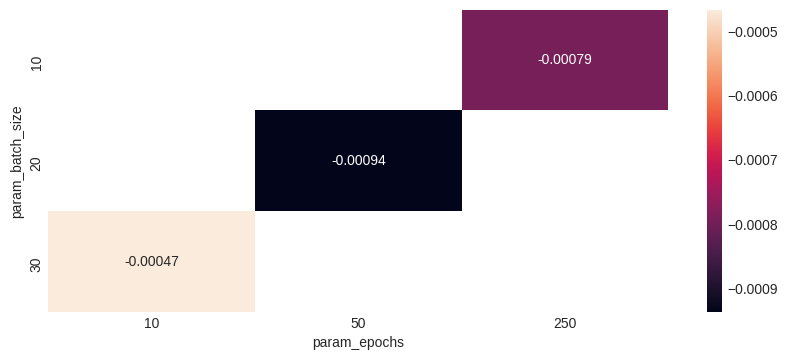

In [359]:
fig = plt.figure(figsize=(10,4),dpi=100)
sns.heatmap(logresults_deeplearning.pivot_table(index='param_batch_size',columns='param_epochs',values='mean_test_score'),annot=True)

From the above analysis we can see that the best score can be obtained when the test score with the Keras Regressor model is used with epochs = 100 and batch size = 30.

### Applying best parameters

In [360]:
model = Sequential()
model.add(Dense(15,input_dim=15, kernel_initializer='normal', activation='relu'))
model.add(Dense(10, kernel_initializer='normal', activation='relu'))
model.add(Dense(5, kernel_initializer='normal', activation='relu'))
model.add(Dense(3, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(optimizer = 'sgd',loss='mse',metrics=['mse'])

In [364]:
model.fit(X_train_scale.values,Y_train.values,epochs=10,batch_size=30,validation_data=(X_test_scale.values,Y_test.values))

Epoch 1/10
486/486 [==============================] - 0s 519us/step - loss: 136832360448.0000 - mse: 136832360448.0000 - val_loss: 134252888064.0000 - val_mse: 134252888064.0000
Epoch 2/10
486/486 [==============================] - 0s 410us/step - loss: 136819736576.0000 - mse: 136819736576.0000 - val_loss: 134230335488.0000 - val_mse: 134230335488.0000
Epoch 3/10
486/486 [==============================] - 0s 469us/step - loss: 136848048128.0000 - mse: 136848048128.0000 - val_loss: 134412992512.0000 - val_mse: 134412992512.0000
Epoch 4/10
486/486 [==============================] - 0s 492us/step - loss: 136836726784.0000 - mse: 136836726784.0000 - val_loss: 134252404736.0000 - val_mse: 134252404736.0000
Epoch 5/10
486/486 [==============================] - 0s 451us/step - loss: 136859148288.0000 - mse: 136859148288.0000 - val_loss: 134286385152.0000 - val_mse: 134286385152.0000
Epoch 6/10
486/486 [==============================] - 0s 440us/step - loss: 136844189696.0000 - mse: 136844189

In [365]:
output_deeplearning = pd.DataFrame(model.history.history)
output_deeplearning.head()

,loss,mse,val_loss,val_mse
0,1.368324e+11,1.368324e+11,1.342529e+11,1.342529e+11
1,1.368197e+11,1.368197e+11,1.342303e+11,1.342303e+11
2,1.368480e+11,1.368480e+11,1.344130e+11,1.344130e+11
3,1.368367e+11,1.368367e+11,1.342524e+11,1.342524e+11
4,1.368591e+11,1.368591e+11,1.342864e+11,1.342864e+11


Text(0.5, 0, 'Epochs')

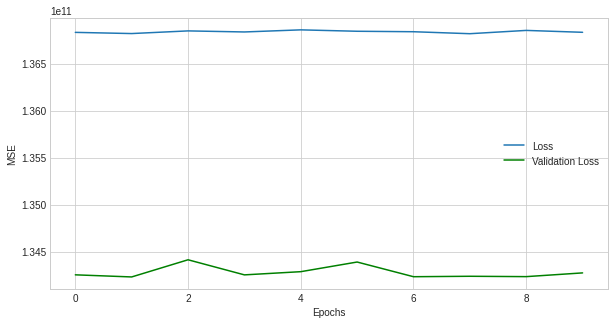

In [369]:
fig = plt.figure(figsize=(10,5))
sns.lineplot(x= output_deeplearning.index,y=output_deeplearning['loss'],label='Loss')
sns.lineplot(x= output_deeplearning.index,y=output_deeplearning['val_loss'],label='Validation Loss',color='Green')
plt.ylabel('MSE')
plt.xlabel('Epochs')

Text(0.5, 0, 'Epochs')

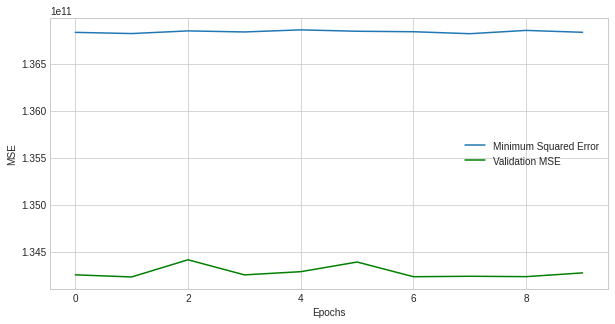

In [370]:
fig = plt.figure(figsize=(10,5))
sns.lineplot(x= output_deeplearning.index,y=output_deeplearning['mse'],label='Minimum Squared Error')
sns.lineplot(x= output_deeplearning.index,y=output_deeplearning['val_mse'],label='Validation MSE',color='Green')
plt.ylabel('MSE')
plt.xlabel('Epochs')

From above analysis we see that, as Epochs increases, MSE decreases. We will have to keep training the model for higher values of Epochs, as we want to maximize R2 score and not the MSE.

### Evaluating and Predicting on test data

In [371]:
model.evaluate(X_test_scale, Y_test)

152/152 [==============================] - 0s 604us/step - loss: 134273417216.0000 - mse: 134273417216.0000


[134273417216.0, 134273417216.0]

In [372]:
from sklearn.metrics import r2_score, recall_score, precision_score

Y_train_predict = model.predict(X_train_scale)
Y_test_predict = model.predict(X_test_scale)

print('Train score: {:.2f}'.format(r2_score(Y_train, Y_train_predict)))
print('Test score: {:.2f}'.format(r2_score(Y_test, Y_test_predict)))

Train score: -0.00
Test score: -0.00


Thus after prediction on the test data, the test score is -0.00